<br>
<br>
<br>

## Prediction - Telecom Churn

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

import warnings
warnings.filterwarnings('ignore')

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# read data
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]
tlcom = pd.read_csv("telecom_churn_data.csv", parse_dates = date_cols)

In [4]:
# look at initial rows of the data
tlcom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,

In [5]:
tlcom.shape

(99999, 226)

In [6]:
# feature type summary
tlcom.info(verbose=1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mobile_number             99999 non-null  int64         
 1   circle_id                 99999 non-null  int64         
 2   loc_og_t2o_mou            98981 non-null  float64       
 3   std_og_t2o_mou            98981 non-null  float64       
 4   loc_ic_t2o_mou            98981 non-null  float64       
 5   last_date_of_month_6      99999 non-null  datetime64[ns]
 6   last_date_of_month_7      99398 non-null  datetime64[ns]
 7   last_date_of_month_8      98899 non-null  datetime64[ns]
 8   last_date_of_month_9      98340 non-null  datetime64[ns]
 9   arpu_6                    99999 non-null  float64       
 10  arpu_7                    99999 non-null  float64       
 11  arpu_8                    99999 non-null  float64       
 12  arpu_9           

In [7]:
#code to print different data types in dataframe
print(tlcom.dtypes.astype(str).value_counts())

float64           179
int64              35
datetime64[ns]     12
dtype: int64


There are 99999 rows and 226 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [8]:
# look at data statistics
tlcom.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [9]:
# create backup of data
original = tlcom.copy()

In [10]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in tlcom.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == tlcom.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Handling missing values

In [11]:
# look at missing value ratio in each column
tlcom.isnull().sum()*100/tlcom.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### Data Cleaning

Data Understanding for imputing nulls in numerical columns with 0

All MOU columns
Below are the Totals columns for MOU. These columns do not have any null values.
total_og_mou_6 total_og_mou_7 total_og_mou_8 total_og_mou_9 total_ic_mou_6 total_ic_mou_7 total_ic_mou_8 total_ic_mou_9

However the MOU columns that add up to these total columns have NULLs. Hence the non-Total MOU columns can be imputed with 0s.

1. Total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, arpu_3g, arpu_2g, night_pck_user, fb_user

vol_2g_mb, vol_3g_mb, monthly_2g, sachet_2g_6, monthly_3g, sachet_3g_6 columns are 0 where Total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data,arpu_3g, arpu_2g, night_pck_user,fb_user are Nulls indicating that the customer did not recharge or consume data during the month. Hence null values in thse columns have been imputed with 0

### Imputing the variables with missing values

In [12]:
## impute nulls with 0 for all the numeric columns
num_fillCols = tlcom.select_dtypes(include=np.number).columns
tlcom[num_fillCols] = tlcom[num_fillCols].fillna(0)
#print(num_cols)

In [13]:
## impute the nulls in the last date columns with the respective last dates of the months
tlcom['last_date_of_month_7'] = tlcom['last_date_of_month_7'].fillna(datetime(2014,7,31))
tlcom['last_date_of_month_8'] = tlcom['last_date_of_month_8'].fillna(datetime(2014,8,31))
tlcom['last_date_of_month_9'] = tlcom['last_date_of_month_9'].fillna(datetime(2014,9,30))

In [14]:
## drop the columns that have more than 95% of the values either as zero/null
cols = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
        'std_og_t2c_mou_8','std_og_t2c_mou_9','isd_og_mou_9','og_others_9','std_ic_t2o_mou_6',
        'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','night_pck_user_9','sachet_3g_9']
tlcom = tlcom.drop(columns=cols)

In [15]:
## check the % of nulls in the columns
tlcom.isnull().sum()/tlcom.shape[0]*100

mobile_number                0.000000
circle_id                    0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.000000
last_date_of_month_8         0.000000
last_date_of_month_9         0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
onnet_mou_9                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
offnet_mou_9                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_ic_mou_9                0.000000
roam_og_mou_6                0.000000
roam_og_mou_7                0.000000
roam_og_mou_8                0.000000
roam_og_mou_9                0.000000
loc_og_t2t_m

### Derived variables

#### Create derived variables for Churn/Non-Churn, Recency of last recharge and data recharge

In [16]:
## get the last recharge date by taking the most recent recharge between month 6,7,8.  if no recharge was done in any of the 3
## months then set 1-Sep-2014 as the default recharge date
tlcom['last_recharge_date'] =  tlcom[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1)
tlcom['last_recharge_date']= tlcom['last_recharge_date'].fillna(datetime(2014,9,1))

In [17]:
## check the new column created
tlcom['last_recharge_date'].head()

0   2014-08-08
1   2014-08-28
2   2014-08-14
3   2014-08-31
4   2014-08-09
Name: last_recharge_date, dtype: datetime64[ns]

In [18]:
## calculate the receny of last recharge in terms of dates and create a new variable
tlcom['recency_of_last_rech'] = (datetime(2014,9,1) - tlcom['last_recharge_date'])
tlcom['recency_of_last_rech'] =tlcom['recency_of_last_rech'].apply(lambda x: x.days)
tlcom['recency_of_last_rech'].head()

0    24
1     4
2    18
3     1
4    23
Name: recency_of_last_rech, dtype: int64

In [19]:
## get the last data recharge date by taking the most recent recharge between month 6,7,8.  if no recharge was done in any of the 3
## months then set 1-Sep-2014 as the default recharge date
tlcom['last_data_recharge_date'] =  tlcom[['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']].max(axis=1)
tlcom['last_data_recharge_date']=tlcom['last_data_recharge_date'].fillna(datetime(2014,9,1))

In [20]:
## check the new column created
tlcom['last_data_recharge_date'].head()

0   2014-08-08
1   2014-08-10
2   2014-09-01
3   2014-09-01
4   2014-06-04
Name: last_data_recharge_date, dtype: datetime64[ns]

In [21]:
## calculate the receny of last recharge in terms of dates and create a new variable
tlcom['recency_of_last_data_rech'] = (datetime(2014,9,1) - tlcom['last_data_recharge_date'])
tlcom['recency_of_last_data_rech'] = tlcom['recency_of_last_data_rech'].apply(lambda x: x.days)
tlcom['recency_of_last_data_rech'].head()

0    24
1    22
2     0
3     0
4    89
Name: recency_of_last_data_rech, dtype: int64

In [22]:
## drop the recharge related date variables
date_cols =['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_recharge_date',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','last_data_recharge_date']
tlcom = tlcom.drop(columns=date_cols)

In [23]:
##  check the dataframe info to understand the datatypes 
tlcom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 207 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              99999 non-null  int64         
 1   circle_id                  99999 non-null  int64         
 2   last_date_of_month_6       99999 non-null  datetime64[ns]
 3   last_date_of_month_7       99999 non-null  datetime64[ns]
 4   last_date_of_month_8       99999 non-null  datetime64[ns]
 5   last_date_of_month_9       99999 non-null  datetime64[ns]
 6   arpu_6                     99999 non-null  float64       
 7   arpu_7                     99999 non-null  float64       
 8   arpu_8                     99999 non-null  float64       
 9   arpu_9                     99999 non-null  float64       
 10  onnet_mou_6                99999 non-null  float64       
 11  onnet_mou_7                99999 non-null  float64       
 12  onn

In [24]:
# find the number of rows that have total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 as 0 to identify the people who have churned
#tlcom[(tlcom['total_ic_mou_9'] == 0)] + (tlcom['total_og_mou_9'] == 0)]

In [25]:
#tlcom[(tlcom['vol_2g_mb_9'] == 0) & (tlcom['vol_3g_mb_9'] == 0)]

In [26]:
## create a new column Churn and set to 1 when total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are 0. Else set as 0
cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
tlcom['Churn'] = tlcom[cols].apply(lambda x: 1 if (x[0] == 0 and x[1] == 0 and x[2] == 0 and  x[3]==0) else 0, axis=1)

In [27]:
## Check if the Churn variable has been set correctly as per the rule above
tlcom[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','Churn']].head(20)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Churn
0,0.00,0.00,0.00,0.00,1
1,188.04,72.11,0.00,0.00,0
2,517.74,124.94,0.00,8.42,0
3,305.38,362.54,0.00,0.00,0
4,205.31,104.59,0.00,0.00,0
5,205.39,185.71,0.00,0.00,0
6,2572.49,65.91,0.00,0.00,0
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
9,412.63,151.33,0.00,0.00,0


In [28]:
###  get the number of rows set with Churn as 1
tlcom[tlcom['Churn']==1].shape

(10191, 208)

In [29]:
## The columns of month 9 are no longer required and can be dropped. Get the columns for month 9

month_9_cols = tlcom.columns[tlcom.columns.str.contains("_9")]
#month_9_cols
## drop the month_9 columns from the dataframe
tlcom = tlcom.drop(columns=month_9_cols)

#### Churn Ratio

In [30]:
# change data type to category
tlcom.Churn = tlcom.Churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(tlcom.Churn.value_counts()*100/tlcom.shape[0])

Churn Ratio:
0    89.808898
1    10.191102
Name: Churn, dtype: float64


In [31]:
##  check the dataframe info
tlcom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 160 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              99999 non-null  int64         
 1   circle_id                  99999 non-null  int64         
 2   last_date_of_month_6       99999 non-null  datetime64[ns]
 3   last_date_of_month_7       99999 non-null  datetime64[ns]
 4   last_date_of_month_8       99999 non-null  datetime64[ns]
 5   arpu_6                     99999 non-null  float64       
 6   arpu_7                     99999 non-null  float64       
 7   arpu_8                     99999 non-null  float64       
 8   onnet_mou_6                99999 non-null  float64       
 9   onnet_mou_7                99999 non-null  float64       
 10  onnet_mou_8                99999 non-null  float64       
 11  offnet_mou_6               99999 non-null  float64       
 12  off

#### Drop variables that are not useful for the model

In [32]:
###  drop the columns mobile number, circle_id, last_date_of_month_* as they are not useful to the model

tlcom = tlcom.drop(columns=['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'])

In [33]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [34]:
cat_cols.remove('night_pck_user_9')
cat_cols.remove('fb_user_9')

In [35]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [36]:
tlcom[cat_cols].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.006310,0.005890,0.005490,0.230002,0.232382,0.234632
std,0.079185,0.076521,0.073892,0.420836,0.422354,0.423771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data Filtering

<b> Filter the high value customers for further analysis and modeling as per the requirement.

In [37]:
#Drop variables with more than a given threshold of missing values
#initial_cols = tlcom.shape[1]

#MISSING_THRESHOLD = 0.7

#include_cols = list(tlcom.apply(lambda column: True if column.isnull().sum()/tlcom.shape[0] < MISSING_THRESHOLD else False))

#drop_missing = pd.DataFrame({'features':tlcom.columns , 'include': include_cols})
#drop_missing.loc[drop_missing.include == True,:]

In [38]:
# drop columns
#tlcom = tlcom.loc[:, include_cols]

#dropped_cols = tlcom.shape[1] - initial_cols
#print("{0} columns dropped.".format(dropped_cols))

In [39]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

#### Filter high-value customers

Calculate total data recharge amount

In [40]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
tlcom['total_data_rech_6'] = tlcom.total_rech_data_6 * tlcom.av_rech_amt_data_6
tlcom['total_data_rech_7'] = tlcom.total_rech_data_7 * tlcom.av_rech_amt_data_7

Add total data recharge and total recharge to get total combined recharge amount for a month

In [41]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
tlcom['amt_data_6'] = tlcom.total_rech_amt_6 + tlcom.total_data_rech_6
tlcom['amt_data_7'] = tlcom.total_rech_amt_7 + tlcom.total_data_rech_7

In [42]:
# calculate average recharge done by customer in June and July
tlcom['avg_rechg_amt_6_7'] = (tlcom.amt_data_6 + tlcom.amt_data_7)/2

In [43]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(tlcom.avg_rechg_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [44]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

## get the 70th percentile on the average recharge column
avg_rechg_amt_70_perc = tlcom['avg_rechg_amt_6_7'].quantile(0.7)
## get all the high value customers whose average recharge amount is >= 70th percentile of the average recharge amount for month 6 and 7
tlcom = tlcom[tlcom['avg_rechg_amt_6_7']>=avg_rechg_amt_70_perc]
## drop the average recharge amount column 


In [45]:
# delete variables created to filter high-value customers
tlcom = tlcom.drop(columns=['avg_rechg_amt_6_7',
                            'total_data_rech_6',
                            'total_data_rech_7',
                            'amt_data_6',
                            'amt_data_7'])

In [46]:
tlcom.shape

(30001, 156)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

### Check for outliers and Handle outlier
As total recharge is a representive indicator of a customer's behavior, removing the outlers on the Total recharge columns for months 6,7 and 8

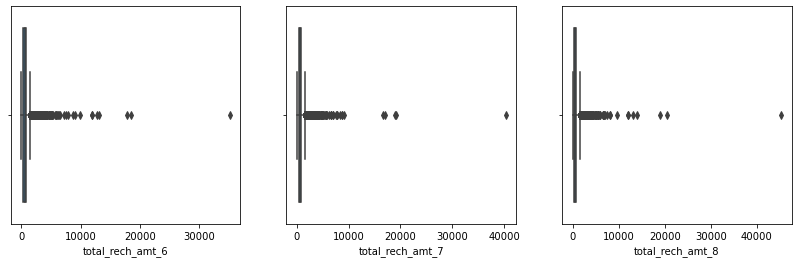

In [47]:
##  check the total outgoing mou 

plt.figure(figsize=(14, 4))
plt.subplot(1,3,1)
sns.boxplot(tlcom['total_rech_amt_6'])
plt.subplot(1,3,2)
sns.boxplot(tlcom['total_rech_amt_7'])
plt.subplot(1,3,3)
sns.boxplot(tlcom['total_rech_amt_8'])
plt.show()

In [48]:
## get the 99.9th percentile of the total rech amount
per_99_6 = tlcom['total_rech_amt_6'].quantile(0.999)
per_99_7 = tlcom['total_rech_amt_7'].quantile(0.999)
per_99_8 = tlcom['total_rech_amt_8'].quantile(0.999)

In [49]:
print(tlcom[tlcom['total_rech_amt_6'] > per_99_6].shape)
print(tlcom[tlcom['total_rech_amt_7'] > per_99_7].shape)
print(tlcom[tlcom['total_rech_amt_8'] > per_99_8].shape)

(30, 156)
(30, 156)
(30, 156)


In [50]:
## remove the outlier rows 
tlcom=tlcom[tlcom['total_rech_amt_6'] < per_99_6]
tlcom=tlcom[tlcom['total_rech_amt_7'] < per_99_7]
tlcom=tlcom[tlcom['total_rech_amt_8'] < per_99_8]

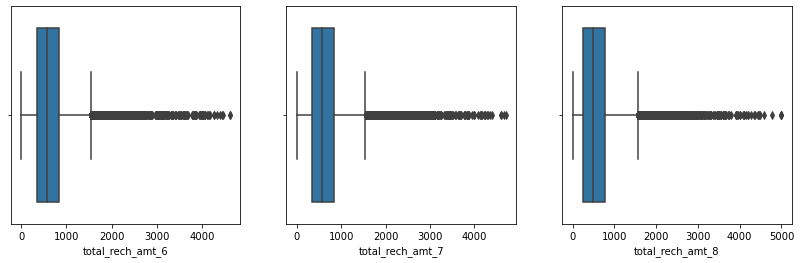

In [51]:
##  check the total outgoing mou 
plt.figure(figsize=(14, 4))
plt.subplot(1,3,1)
sns.boxplot(tlcom['total_rech_amt_6'])
plt.subplot(1,3,2)
sns.boxplot(tlcom['total_rech_amt_7'])
plt.subplot(1,3,3)
sns.boxplot(tlcom['total_rech_amt_8'])
plt.show()

In [52]:
# check the shape of the dataframe
tlcom.shape

(29945, 156)

Text(0.5, 1.0, 'Churn')

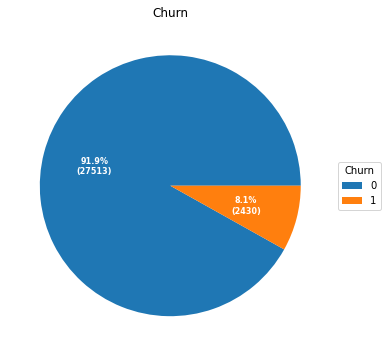

In [53]:
## plot the percentage of Churns vs Non-Churn
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
pf=tlcom['Churn'].value_counts()
wedges, texts, autotexts = ax.pie(pf, autopct=lambda pct: func(pct,pf),
                                  textprops=dict(color="w"))

ax.legend(wedges, pf.index,
          title="Churn",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Churn")

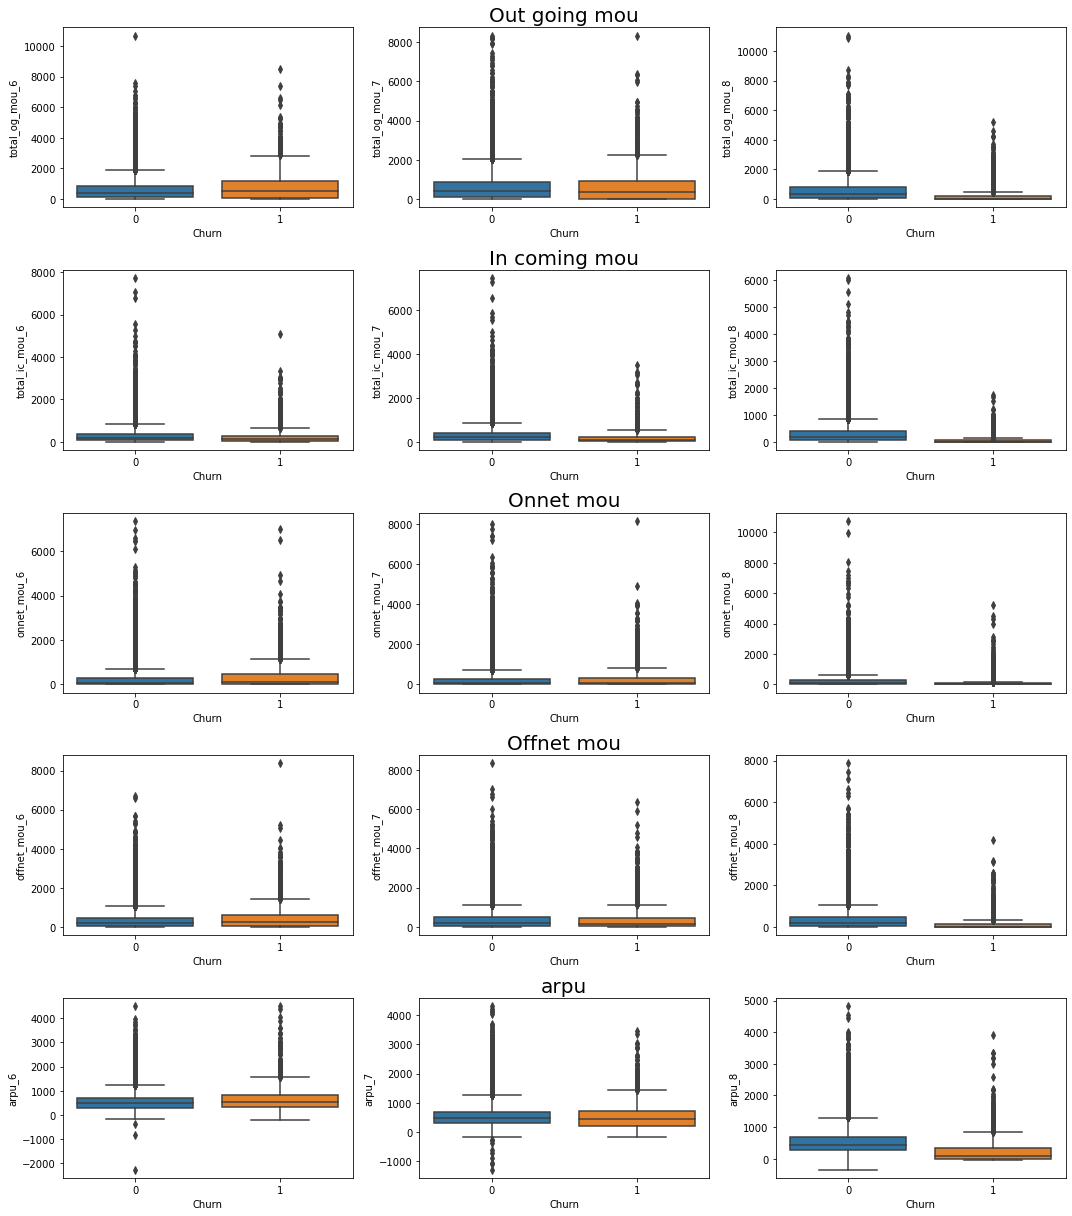

In [54]:
##  check the total outgoing mou 
#plt.figure(figsize=(10, 15))
#plt.subplot(4,2,1)
fig, ax = plt.subplots(5,3,figsize=(15,17))
sns.boxplot(x=tlcom['Churn'],y=tlcom['total_og_mou_6'],ax=ax[0,0])
sns.boxplot(x=tlcom['Churn'],y=tlcom['total_og_mou_7'],ax=ax[0,1])
sns.boxplot(x=tlcom['Churn'],y=tlcom['total_og_mou_8'],ax=ax[0,2])
sns.boxplot(x=tlcom['Churn'],y=tlcom['total_ic_mou_6'],ax=ax[1,0])
sns.boxplot(x=tlcom['Churn'],y=tlcom['total_ic_mou_7'],ax=ax[1,1])
sns.boxplot(x=tlcom['Churn'],y=tlcom['total_ic_mou_8'],ax=ax[1,2])
sns.boxplot(x=tlcom['Churn'],y=tlcom['onnet_mou_6'],ax=ax[2,0])
sns.boxplot(x=tlcom['Churn'],y=tlcom['onnet_mou_7'],ax=ax[2,1])
sns.boxplot(x=tlcom['Churn'],y=tlcom['onnet_mou_8'],ax=ax[2,2])
sns.boxplot(x=tlcom['Churn'],y=tlcom['offnet_mou_6'],ax=ax[3,0])
sns.boxplot(x=tlcom['Churn'],y=tlcom['offnet_mou_7'],ax=ax[3,1])
sns.boxplot(x=tlcom['Churn'],y=tlcom['offnet_mou_8'],ax=ax[3,2])
sns.boxplot(x=tlcom['Churn'],y=tlcom['arpu_6'],ax=ax[4,0])
sns.boxplot(x=tlcom['Churn'],y=tlcom['arpu_7'],ax=ax[4,1])
sns.boxplot(x=tlcom['Churn'],y=tlcom['arpu_8'],ax=ax[4,2])
# set the title to subplots
ax[0, 1].set_title("Out going mou",fontsize=20)
ax[1, 1].set_title("In coming mou",fontsize=20)
ax[2, 1].set_title("Onnet mou",fontsize=20)
ax[3, 1].set_title("Offnet mou",fontsize=20)
ax[4, 1].set_title("arpu",fontsize=20)
plt.tight_layout()
plt.show()

INSIGHT: 
The outgoing minutes of usage reduced significantly in Month 8 compared to Month 6 and 7 in the customers who have churned. The outgoing minutes of usage in Month 8 is a strong predictor of churn vs non-churn.

INSIGHT: The incoming minutes of usage reduced in Month 8 compared to Month 6 and 7 in the customers who have churned. The incoming minutes of usage is a strong predictor of churn vs non-churn.

INSIGHT: The trend of onnnet and offnet minutes of usage are similar to the outgoing and incoming usages indicating a reduction in Month 8 compared to Month 6 and 7.

INSIGHT : The ARPU shows a decreasing trend from Month 6 to Month 8. The ARPU gap between churn and non-churn customers is not significant in month 6 and 7, but is signficant in Month 8.

Text(0.5, 1.0, 'August')

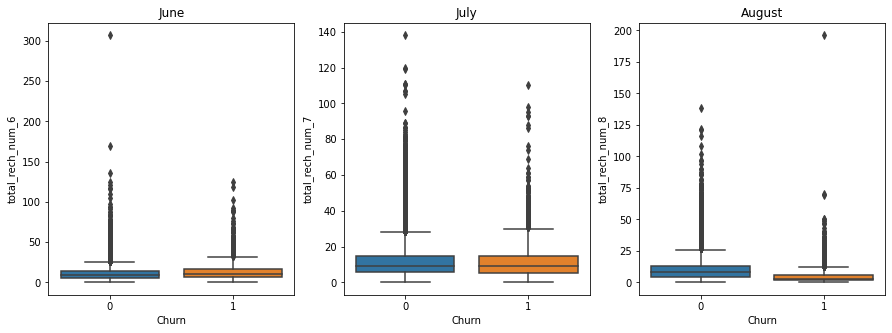

In [55]:
# check the distribution of the total recharge count for months 6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,5))
sns.boxplot(x = tlcom['Churn'], y = tlcom['total_rech_num_6'], ax=ax[0])
sns.boxplot(x = tlcom['Churn'], y = tlcom['total_rech_num_7'], ax=ax[1])
sns.boxplot(x = tlcom['Churn'], y = tlcom['total_rech_num_8'], ax=ax[2])
ax[0].set_title("June")
ax[1].set_title("July")
ax[2].set_title("August")

Oservation: From the above boxplot, subscribers who churned have done less recharge in the month of August as compared to those who have not churned in the same month

Text(0.5, 1.0, 'Total Recharge Amount - August')

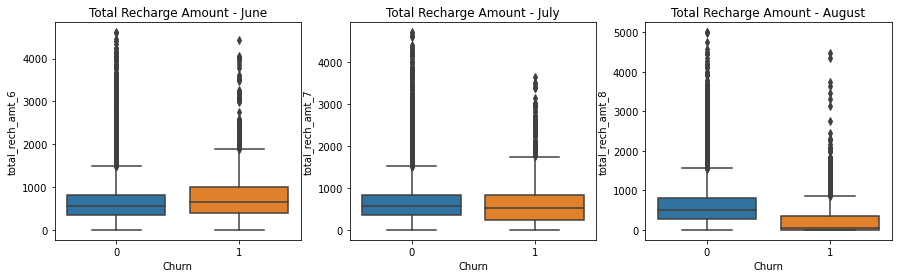

In [56]:
# check the distribution of the total recharge amount for months 6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,4))
sns.boxplot(x = tlcom['Churn'], y = tlcom['total_rech_amt_6'], ax=ax[0])
sns.boxplot(x = tlcom['Churn'], y = tlcom['total_rech_amt_7'], ax=ax[1])
sns.boxplot(x = tlcom['Churn'], y = tlcom['total_rech_amt_8'], ax=ax[2])
ax[0].set_title("Total Recharge Amount - June")
ax[1].set_title("Total Recharge Amount - July")
ax[2].set_title("Total Recharge Amount - August")

Text(0.5, 1.0, 'August-count_rech_3g')

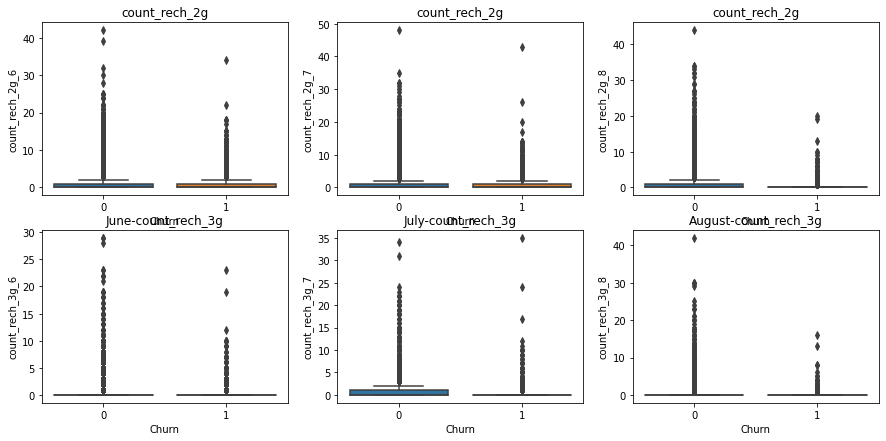

In [57]:
# check the distribution of the "Count of Recharge in 2g and 3g" for the month of  6, 7 and 8
fig, ax = plt.subplots(2,3,figsize =(15,7))
sns.boxplot(x = tlcom['Churn'], y = tlcom['count_rech_2g_6'], ax=ax[0,0])
sns.boxplot(x = tlcom['Churn'], y = tlcom['count_rech_2g_7'], ax=ax[0,1])
sns.boxplot(x = tlcom['Churn'], y = tlcom['count_rech_2g_8'], ax=ax[0,2])
sns.boxplot(x = tlcom['Churn'], y = tlcom['count_rech_3g_6'], ax=ax[1,0])
sns.boxplot(x = tlcom['Churn'], y = tlcom['count_rech_3g_7'], ax=ax[1,1])
sns.boxplot(x = tlcom['Churn'], y = tlcom['count_rech_3g_8'], ax=ax[1,2])
ax[0,0].set_title("count_rech_2g")
ax[0,1].set_title("count_rech_2g")
ax[0,2].set_title("count_rech_2g")
ax[1,0].set_title("June-count_rech_3g")
ax[1,1].set_title("July-count_rech_3g")
ax[1,2].set_title("August-count_rech_3g")

Text(0.5, 1.0, 'Recency_of_last_recharge')

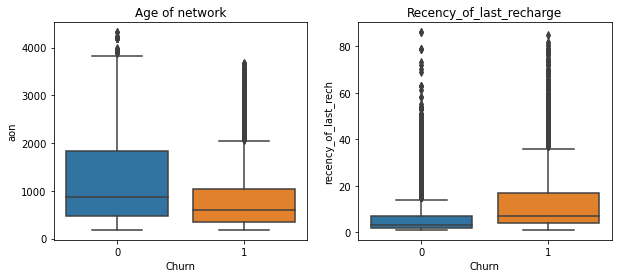

In [58]:
# Check the distribution of the variable "Aon" - Age of network
fig, ax = plt.subplots(1,2,figsize =(10,4))
sns.boxplot(x = tlcom['Churn'], y = tlcom['aon'],ax=ax[0])
# Check the distribution of the derived variable "Recency_of_last_recharge"
sns.boxplot(x = tlcom['Churn'], y = tlcom['recency_of_last_rech'],ax=ax[1])
ax[0].set_title("Age of network")
ax[1].set_title("Recency_of_last_recharge")

Insight: Subscribers who have churned have tenure much less in the network as compred to the Subscribers who have not churned

Insight: Recency of the last recharge is much higher for the subscribers who have churned as compred to the subcribers who have not churned

# Modelling - predictions

## Preprocessing data

In [59]:
# change churn to numeric
#tlcom['Churn'] = pd.to_numeric(tlcom['Churn'])

### Train Test split

In [60]:
# divide data into train and test
X = tlcom.drop("Churn", axis = 1)
y = tlcom.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)

In [61]:
## Save the mobile numbers for future use and remove from X_train & X_test
X_train_mobile_num = X_train.pop('mobile_number')
X_test_mobile_num = X_test.pop('mobile_number')

In [62]:
## scale the columns in the X_train and X_test
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [63]:
# print shapes of train and test sets
print('X_train & y_train:', X_train.shape, y_train.shape, 'X_test & y_test:', X_test.shape,y_test.shape)

X_train & y_train: (20961, 154) (20961,) X_test & y_test: (8984, 154) (8984,)


### Check data balance

In [64]:
## Check imbalance - the percentage of Churn Vs the percentage of non Churn in the train data. 
y_train.value_counts()/y_train.shape[0]*100

0    91.880158
1     8.119842
Name: Churn, dtype: float64

In [65]:
## Check imbalance - the percentage of Churn Vs the percentage of non Churn in the test data.
y_test.value_counts()/y_test.shape[0]*100

0    91.885574
1     8.114426
Name: Churn, dtype: float64

#### Class Imbalance treatment - Handle class imbalance using SMOTE

In [66]:
## Run smote with the best parameters
##sm = SMOTE(random_state=101, k_neighbors=1, sampling_strategy=0.75)
sm = SMOTE(random_state=101,sampling_strategy=0.35)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [67]:
## check the percentage of Churn in the train.
y_train.value_counts()/y_train.shape[0]*100

0    74.075926
1    25.924074
Name: Churn, dtype: float64

Observation: SMOTE has increased the minority classes 8.1% to 25%

In [68]:
## create dataframes for X_train and X_test
X_train_df =  pd.DataFrame(X_train,columns=X_train.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test,columns=X_test.columns).reset_index(drop=True)
y_train_df =  pd.DataFrame(y_train,columns=['Churn']).reset_index(drop=True)
y_test_df =  pd.DataFrame(y_test,columns=['Churn']).reset_index(drop=True)
## join the X_train and y _train and X_test and y_test
train = pd.concat([X_train_df,y_train_df],axis=1)
## concat the X_test and Y_test
test =  pd.concat([X_test_df,y_test_df],axis=1)
## write train dataframe to train csv
train.to_csv('telecom_train.csv',index=False)
## write test dataframe to test csv
test.to_csv('telecom_test.csv',index=False)

In [69]:
# Load the train dataset
df_train = pd.read_csv("telecom_train.csv")
# Load the test dataset
df_test = pd.read_csv("telecom_test.csv")

In [70]:
y_train = df_train.pop('Churn')
X_train = df_train
# Separate the dependent and Independent variables
y_test = df_test.pop('Churn')
X_test = df_test

### PCA on the train and test dataset


In [71]:
# Import the PCA library
from sklearn.decomposition import PCA
## Create a PCA object to capture 90% of the variance
pca = PCA(0.9)
##  perform fit on PCA
pca.fit(X_train)

PCA(n_components=0.9)

In [72]:
## display the PCA components
pca.components_

array([[-0.08757161, -0.08800472, -0.05589674, ...,  0.02533687,
         0.02879223,  0.04270489],
       [ 0.13658873,  0.17123961,  0.18830251, ...,  0.02561823,
        -0.05919159, -0.03667421],
       [ 0.08341572,  0.10666451,  0.0760024 , ...,  0.00937322,
        -0.03453977, -0.03357226],
       ...,
       [-0.05946171, -0.04564264, -0.05525634, ...,  0.01464432,
         0.01541768, -0.13177019],
       [-0.0447648 ,  0.0371073 , -0.01976841, ...,  0.04069273,
        -0.02308036,  0.14384864],
       [-0.16882741, -0.03500992,  0.09044333, ...,  0.03804733,
         0.07743471, -0.01449202]])

In [73]:
# Look the variance ratio for each components
pca.explained_variance_ratio_*100

array([11.25627688,  9.42225454,  6.25292362,  5.3769126 ,  3.48023544,
        3.13864414,  2.95762588,  2.767394  ,  2.3402573 ,  2.22909352,
        1.98781166,  1.82671452,  1.75498542,  1.70081321,  1.62042532,
        1.58722932,  1.48568306,  1.43272957,  1.41098931,  1.28719904,
        1.16072832,  1.12519269,  1.07188261,  1.02106469,  1.00375684,
        0.974216  ,  0.9477137 ,  0.89965545,  0.87584664,  0.86055641,
        0.79290162,  0.78767934,  0.712459  ,  0.69644263,  0.65440355,
        0.64006764,  0.63517036,  0.61226271,  0.59747864,  0.5930231 ,
        0.57813567,  0.55819914,  0.55361528,  0.53649537,  0.5287734 ,
        0.51752075,  0.49981044,  0.49169872,  0.47740967,  0.46753142,
        0.44823674,  0.44531895,  0.42963984,  0.4085016 ,  0.4017216 ,
        0.38107481,  0.36991507])

In [74]:
# Making the scree plot for the explained variance
var_cum = np.cumsum(pca.explained_variance_ratio_)

In [75]:
## get the number of PCA components explained the selected variance
len(pca.explained_variance_ratio_)

57

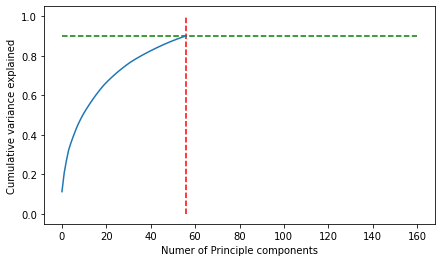

In [76]:
# plot the variance
fig = plt.figure(figsize=[7,4])
plt.vlines(x=56, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.xlabel("Numer of Principle components")
plt.show()

In [77]:
## import required libraries
from sklearn.decomposition import IncrementalPCA
## Create PCA object with 56 components
pca_final = IncrementalPCA(n_components = 57)
# Fit and transform PCA on  the train dataset
telecom_train_pca = pca_final.fit_transform(X_train)
##  check the shape
telecom_train_pca.shape

(25999, 57)

In [78]:
## create the column names for the PCA components
cols = ['PC'+str(i) for i in range(1,58)]
## concatenate the X_train PCA components with the y_train
df_telecom_train_pca = pd.concat([pd.DataFrame(telecom_train_pca,columns= cols),y_train],axis = 1)

In [79]:
## display the head
df_telecom_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,Churn
0,0.165267,3.292415,-3.506439,-0.245261,-1.660366,2.066129,1.426735,0.588936,3.498429,-1.524630,0.160633,-0.236387,-0.161634,0.886454,2.105237,-0.480968,0.566200,0.213859,-1.079365,-0.945461,-0.229481,-0.073608,-1.232712,-0.427711,0.467510,0.573320,0.795661,0.326237,-0.883932,1.216974,0.553191,-0.151913,-1.092587,-0.382091,1.493765,-0.013706,-1.482683,-0.179922,0.291952,-1.089420,-0.798101,1.975097,-1.038341,0.252623,2.766040,0.041039,0.380646,-0.164996,0.691040,-0.458304,0.348351,-0.108059,-0.207624,0.569718,0.285001,-0.442063,-0.232097,0
1,-0.624927,-3.191917,-1.795462,-1.859680,0.527340,1.686257,1.285339,0.624614,-0.241500,0.566045,-0.243149,0.603482,1.559904,-0.999945,0.562900,1.171780,-1.188827,0.483555,-0.301587,0.463069,1.615043,1.405730,-0.463131,0.405673,0.887087,-0.121005,-0.806832,-1.091933,-0.229267,0.006483,0.231170,-0.990894,-0.147967,-0.389768,-0.721122,1.197148,0.423778,-1.779736,-0.094938,-0.060279,0.322019,0.598173,0.366759,-0.085088,0.276256,0.325600,-0.080948,-0.145818,-0.692114,0.328812,-0.009322,0.680781,0.655781,0.741068,0.473801,1.007981,0.105592,1
2,-6.237844,8.023792,6.229251,-1.840174,3.034236,-2.781813,0.059685,2.345492,-1.806433,0.627079,0.143021,-1.192467,-0.836217,2.885983,-0.981312,3.462097,-0.523856,-0.078964,-0.215323,0.683097,0.105888,-0.815565,0.064161,-0.639902,1.704128,3.119917,-0.787018,0.456301,-1.067843,0.719766,-0.243621,0.126061,-0.092533,0.226179,-1.619667,-0.001029,-0.008764,0.018029,-1.595595,-1.187227,-0.155826,-0.945586,0.316485,1.426895,1.317722,2.201391,0.837589,0.549248,-0.521042,0.059357,-0.835036,-1.634050,-0.048240,0.109965,2.398190,0.044306,3.729591,0
3,-4.092894,-5.729920,-0.774616,6.107917,0.362723,-1.566875,-0.479548,0.436743,1.957547,0.946875,0.086454,-2.111002,-0.662592,-0.437127,-1.725884,1.017627,0.476078,-0.281849,0.837863,-0.430038,0.183661,0.178495,0.062490,0.359332,-0.032245,-0.252888,-0.011242,0.167128,-0.280084,-0.519761,-0.422140,-0.221122,0.310518,0.053118,0.557006,-0.232784,0.228235,-0.171982,-0.374742,-0.076681,0.153738,-0.386376,-0.049525,-0.186802,-0.021430,0.028591,-0.004272,0.128814,0.190505,-0.101989,0.098230,-0.034374,0.122508,-0.052844,-0.140799,-0.096933,0.427873,0
4,2.966534,-1.309275,-0.292330,-0.210122,0.188206,0.145281,1.821876,-1.206914,-1.411318,-1.386144,0.497818,-0.882763,-0.195211,-0.085198,0.534425,0.468888,-0.476425,-0.886044,0.205118,0.574398,-0.411909,-0.027191,0.533419,-0.357376,0.100613,-0.331125,-0.092976,0.096295,0.114661,0.023776,0.159834,-0.041815,-0.899164,0.191392,0.013693,0.135721,-0.224559,-0.445579,-0.075953,0.221503,0.371701,-0.099744,-0.109241,-0.154367,-0.343831,-0.290095,-0.558237,0.563538,0.002103,-0.050041,-0.167354,-0.107444,-0.087301,0.030013,0.045093,0.119745,0.066029,1


In [80]:
## write the train df to a csv
df_telecom_train_pca.to_csv("telecom_train_PCA.csv",index = False)
# Claculate correlation on the PCA dataset
corrmat = np.corrcoef(telecom_train_pca.transpose())
## display the shape of the correlation matrix
corrmat.shape

(57, 57)

#### Apply PCA transformation on the test dataset

In [81]:
## perform the PCA transformation on the test dataset
telecom_test_pca = pca_final.transform(X_test)
## concatenate the X_test PCA components with the y_test
df_telecom_test_pca = pd.concat([pd.DataFrame(telecom_test_pca,columns = cols),y_test], axis = 1)
## display the head of the df
df_telecom_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,Churn
0,-2.911592,-4.794877,-0.661271,4.712683,-0.083340,-1.184037,-0.084204,0.405942,0.871706,0.703225,0.447444,-1.917769,-0.203336,-0.178574,-1.751199,0.668661,-0.483362,-0.178280,0.703702,0.044216,0.048239,0.053692,0.477201,0.362988,-0.603228,-0.349277,-0.155471,-0.100886,0.116461,-0.244152,-0.165170,-0.152038,0.487443,-0.965648,0.537693,-0.176435,-0.271552,0.197673,-0.165804,0.871527,0.278717,-0.124723,-0.249006,-0.315896,0.306438,0.105360,-0.370944,-0.137866,-0.105169,-0.037722,-0.152555,-0.266518,-0.315821,-0.243696,0.110847,-0.325341,0.425320,0
1,3.305251,1.694661,-3.154687,-0.666358,-3.618407,-0.539578,-1.310964,0.636496,-0.246811,2.090080,4.413285,0.042842,0.007758,0.062969,0.952791,0.407745,0.151876,0.590904,0.726853,-0.472394,-0.165242,0.069471,-0.289809,0.713834,0.101337,-0.939098,-0.258701,0.346551,0.353730,-0.198416,-0.684617,0.100609,0.474469,1.040038,0.521872,0.086674,-0.038023,-0.198655,-0.166857,0.178998,0.145138,-0.079528,0.152669,0.806846,-0.607953,0.382475,0.104016,0.857102,0.292678,0.065989,-0.117170,-0.245226,-0.040645,0.177777,0.031602,-0.117789,-0.793780,0
2,-9.076749,4.301960,4.174392,-7.943212,-0.569447,1.563035,1.208768,-0.057370,3.630253,1.850980,-0.459495,1.377750,-0.711212,-3.083686,-2.041923,1.690120,5.699385,-0.327451,-1.095127,-3.631667,-0.182336,-0.040584,-0.401487,-1.725286,-0.178094,-3.681566,2.299828,0.634767,1.509299,-0.109359,2.031057,-0.994779,-0.681893,-2.516155,1.310217,2.321989,1.135930,0.960224,2.026152,3.058771,0.306704,-2.555222,-0.260242,-0.812872,1.216613,-1.942729,0.773054,0.359615,-1.914046,0.633583,0.882672,-1.545870,-0.595862,0.402736,-0.133148,0.148877,-3.304672,1
3,-0.183409,4.242401,-3.484684,-1.058911,0.699904,0.302364,-2.161468,-0.123506,3.244053,1.616221,-0.839764,0.022386,-1.090356,0.959318,2.585253,-1.776384,1.822592,-0.251926,0.553041,0.911197,-0.966420,1.176190,0.180832,-0.340320,-1.555547,-0.028806,0.263480,-1.733742,-0.621102,0.367453,-0.083444,-0.575564,-0.668619,-2.253633,1.411304,-0.052196,-1.683294,-1.010117,0.440961,-0.224056,0.045234,0.753246,0.782489,0.621032,0.783314,-0.307173,1.861788,-0.598784,1.716699,0.068885,0.266732,0.382350,-0.637108,0.746193,-0.079323,-0.561950,0.741379,0
4,1.757687,-0.219528,-2.694024,-1.073080,-1.253339,-0.422801,0.207673,0.164039,-1.562288,0.037650,0.428454,-0.920956,-0.011849,0.178236,-0.253802,-0.632923,-0.510949,0.043308,-0.448479,-0.253753,-0.116707,-0.088707,0.299224,-0.155729,0.141460,-0.663017,-0.074430,0.163249,0.091997,-0.101067,0.550144,0.070235,0.076302,0.571553,0.233399,0.407664,-0.125384,-0.811720,0.029238,0.163034,0.235425,0.009125,0.589521,0.913445,0.041745,0.320862,0.671915,0.523611,0.336127,0.266566,-0.200996,-0.046401,-0.142126,0.087499,0.207300,0.234525,0.200974,0


In [82]:
## perform the PCA transformation on the test dataset
telecom_test_pca = pca_final.transform(X_test)
## display the shape
#telecom_test_pca.shape
## concatenate the X_test PCA components with the y_test
df_telecom_test_pca = pd.concat([pd.DataFrame(telecom_test_pca,columns = cols),y_test], axis = 1)
## display the head of the df
df_telecom_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,Churn
0,-2.911592,-4.794877,-0.661271,4.712683,-0.083340,-1.184037,-0.084204,0.405942,0.871706,0.703225,0.447444,-1.917769,-0.203336,-0.178574,-1.751199,0.668661,-0.483362,-0.178280,0.703702,0.044216,0.048239,0.053692,0.477201,0.362988,-0.603228,-0.349277,-0.155471,-0.100886,0.116461,-0.244152,-0.165170,-0.152038,0.487443,-0.965648,0.537693,-0.176435,-0.271552,0.197673,-0.165804,0.871527,0.278717,-0.124723,-0.249006,-0.315896,0.306438,0.105360,-0.370944,-0.137866,-0.105169,-0.037722,-0.152555,-0.266518,-0.315821,-0.243696,0.110847,-0.325341,0.425320,0
1,3.305251,1.694661,-3.154687,-0.666358,-3.618407,-0.539578,-1.310964,0.636496,-0.246811,2.090080,4.413285,0.042842,0.007758,0.062969,0.952791,0.407745,0.151876,0.590904,0.726853,-0.472394,-0.165242,0.069471,-0.289809,0.713834,0.101337,-0.939098,-0.258701,0.346551,0.353730,-0.198416,-0.684617,0.100609,0.474469,1.040038,0.521872,0.086674,-0.038023,-0.198655,-0.166857,0.178998,0.145138,-0.079528,0.152669,0.806846,-0.607953,0.382475,0.104016,0.857102,0.292678,0.065989,-0.117170,-0.245226,-0.040645,0.177777,0.031602,-0.117789,-0.793780,0
2,-9.076749,4.301960,4.174392,-7.943212,-0.569447,1.563035,1.208768,-0.057370,3.630253,1.850980,-0.459495,1.377750,-0.711212,-3.083686,-2.041923,1.690120,5.699385,-0.327451,-1.095127,-3.631667,-0.182336,-0.040584,-0.401487,-1.725286,-0.178094,-3.681566,2.299828,0.634767,1.509299,-0.109359,2.031057,-0.994779,-0.681893,-2.516155,1.310217,2.321989,1.135930,0.960224,2.026152,3.058771,0.306704,-2.555222,-0.260242,-0.812872,1.216613,-1.942729,0.773054,0.359615,-1.914046,0.633583,0.882672,-1.545870,-0.595862,0.402736,-0.133148,0.148877,-3.304672,1
3,-0.183409,4.242401,-3.484684,-1.058911,0.699904,0.302364,-2.161468,-0.123506,3.244053,1.616221,-0.839764,0.022386,-1.090356,0.959318,2.585253,-1.776384,1.822592,-0.251926,0.553041,0.911197,-0.966420,1.176190,0.180832,-0.340320,-1.555547,-0.028806,0.263480,-1.733742,-0.621102,0.367453,-0.083444,-0.575564,-0.668619,-2.253633,1.411304,-0.052196,-1.683294,-1.010117,0.440961,-0.224056,0.045234,0.753246,0.782489,0.621032,0.783314,-0.307173,1.861788,-0.598784,1.716699,0.068885,0.266732,0.382350,-0.637108,0.746193,-0.079323,-0.561950,0.741379,0
4,1.757687,-0.219528,-2.694024,-1.073080,-1.253339,-0.422801,0.207673,0.164039,-1.562288,0.037650,0.428454,-0.920956,-0.011849,0.178236,-0.253802,-0.632923,-0.510949,0.043308,-0.448479,-0.253753,-0.116707,-0.088707,0.299224,-0.155729,0.141460,-0.663017,-0.074430,0.163249,0.091997,-0.101067,0.550144,0.070235,0.076302,0.571553,0.233399,0.407664,-0.125384,-0.811720,0.029238,0.163034,0.235425,0.009125,0.589521,0.913445,0.041745,0.320862,0.671915,0.523611,0.336127,0.266566,-0.200996,-0.046401,-0.142126,0.087499,0.207300,0.234525,0.200974,0


In [83]:
## write the transformed test df to a csv
df_telecom_test_pca.to_csv("telecom_test_PCA.csv", index = False)

### Models - 
Create multiple models to predict Telecom Churn

Please note : GridSearch run times are provided in each of the models. These are run times for PCs with 4 core CPUs with 8GB RAM. XGBoost was run utilizing the GPU on the PC(Nvidia GTX 1650 with 4GB dedicated video memory)


### Logistic Regression with PCA

#### Functions for evaluation metrics

In [84]:
## determine the accuracy, precsion and recall for different cut-off points
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

def plot_cutoff_precision_recall(y_train_in, y_train_pred_in):
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
    recall=[]
    preci=[]
    accu=[]
    for cut_off in np.arange(0.1,1,0.1):
        y_train_pred_2 = pd.Series(y_train_pred_in[:,1]).apply(lambda x : 1 if x > cut_off else 0)
        cf = confusion_matrix(y_train_in,y_train_pred_2)
        acc = accuracy_score(y_train_in,y_train_pred_2)
        pre = precision_score(y_train_in,y_train_pred_2)
        rec = recall_score(y_train_in,y_train_pred_2)
        accu.append(acc)
        preci.append(pre)
        recall.append(rec)
        cutoff_df.loc[cut_off] = [cut_off, acc, pre, rec]
    
    ## plot the accuracy, precision and recall for the different cut-offs
    plt.plot(np.arange(0.1,1,0.1),accu,color='b',label='accuracy')
    plt.plot(np.arange(0.1,1,0.1),preci,color='g',label='precision')
    plt.plot(np.arange(0.1,1,0.1),recall,color='r',label='recall')
    plt.legend()
    return cutoff_df

In [85]:
## this function takes a fitted classifier and displays the model evaluation metrics in a structured way.  
## It also creates a dataframe with the evaluation metrics

def eval_metrics(classifier,model_name):
    ### Prediction
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import precision_recall_curve, auc

    y_pred_train = classifier.predict(X_train)

    train_accuracy = accuracy_score(y_train,y_pred_train, normalize = True)
    print("Train Accuracy: ", round(train_accuracy,3))

    y_pred_test = classifier.predict(X_test)

    # Calculate the accuracy score for test dataset
    test_accuarcy = accuracy_score(y_test,y_pred_test, normalize = True)
    print("Test Accuracy: ",round(test_accuarcy,3))
    
    
    # Classification report and Confusion Matrix for train dataset
    print("\n")
    print(color.BLUE+color.BOLD+'TRAIN DATA - RESULTS' +color.END)
    print("Train dataset- Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
    #print("Train dataset- Classification Report:\n",classification_report(y_train,y_pred_train))

     
    ### Probability Estimates , ROC Curve, Precision and Recall Curve on Train dataset

    y_train_scores = classifier.predict_proba(X_train)

    precision, recall, thresholds = precision_recall_curve(y_train, y_train_scores[:,1])

    ## Area under Precision Recall Curve
    #print("Train PR-AUC: ",auc(recall, precision))
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    # Plot the precision recall curves
    plt.plot(recall, precision, marker='.', label='classifier')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.title("Precision_Recall_Curve")
    # show the plot

    roc_auc = roc_auc_score(y_train, y_train_scores[:,1])
    #print("Train ROC-AUC: ",roc_auc)

    # plot the roc curve for the model
    classifier_fpr, classifier_tpr, _ = roc_curve(y_train, y_train_scores[:,1])
    
    plt.subplot(1,2,2)
    plt.plot(classifier_fpr, classifier_tpr, marker='.', label='classifier')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    plt.title("ROC_Curve")    
    # show plot
    plt.show()   
  
    
    
    # Classification report and Confusion Matrix for test dataset
    print(color.BLUE+color.BOLD+'TEST DATA - RESULTS' +color.END)
    print("Test dataset- Confusion Matrix:", '\n',confusion_matrix(y_test,y_pred_test))
    #print("Test dataset- Classification Report:\n",classification_report(y_test,y_pred_test))

    ### Probability Estimates, ROC_Curve, Precision Recall Curve on Test dataset

    y_test_scores = classifier.predict_proba(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_scores[:,1])

    ## Area under Precision Recall Curve
    #print("Test PR-AUC: ",auc(recall, precision))
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    # Plot the precision recall curves
    plt.plot(recall, precision, marker='.', label='classifier')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.title("Precision_Recall_Curve-Test data")
    # show the plot
    #plt.show()

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    roc_auc = roc_auc_score(y_test, y_test_scores[:,1])
    #print("Test ROC-AUC: ",roc_auc)

    # plot the roc curve for the model
    classifier_fpr, classifier_tpr, _ = roc_curve(y_test, y_test_scores[:,1])
    plt.subplot(1,2,2)
    plt.plot(classifier_fpr, classifier_tpr, marker='.', label='classifier')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    plt.title("ROC_Curve-Test data")
    # show the plot
    plt.show()   

    # evaluation metrics Summary
    train_accuracy = accuracy_score(y_train,y_pred_train)
    train_Precision = precision_score(y_train,y_pred_train)
    train_Recall = recall_score(y_train,y_pred_train)
    train_f1score= f1_score(y_train,y_pred_train)
    y_train_scores = classifier.predict_proba(X_train)
    precision, recall, thresholds = precision_recall_curve(y_train, y_train_scores[:,1])
    train_PR_AUC = auc(recall, precision)
    train_roc_auc = roc_auc_score(y_train, y_train_scores[:,1])

    test_accuracy = accuracy_score(y_test,y_pred_test)
    test_Precision = precision_score(y_test,y_pred_test)
    test_Recall = recall_score(y_test,y_pred_test)
    test_f1score= f1_score(y_test,y_pred_test)
    y_test_scores = classifier.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_scores[:,1])
    test_PR_AUC = auc(recall, precision)
    test_roc_auc = roc_auc_score(y_test, y_test_scores[:,1])

    print(color.BLUE+color.BOLD+'SUMMARY, MODEL NAME : '+color.END)
    
    gcol_names=['Accuracy','Precision','Recall','f1_score','PR_AUC','ROC_AUC']
    table =[[train_accuracy,train_Precision,train_Recall,train_f1score,train_PR_AUC,train_roc_auc],
            [test_accuracy,test_Precision,test_Recall,test_f1score,test_PR_AUC,test_roc_auc]]
    print_metrics_df = pd.DataFrame(table, columns=gcol_names,index=['Train', 'Test'])
    print(print_metrics_df)
    
    col_names=['Model name','tr acc','tr prec','tr Recall','tr_roauc','tr rocauc',
               'tst acc','tst prec','tst Recall','tst_roauc','tst_rocauc']
    cols =[model_name,train_accuracy,train_Precision,train_Recall,train_PR_AUC,train_roc_auc,
           test_accuracy,test_Precision,test_Recall,test_PR_AUC,test_roc_auc]
    metrics_df = pd.DataFrame([cols],columns=col_names)
    return metrics_df 

In [86]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [87]:
def bestmodel_gridsrchcv(model_cv):
    #fit the random forest classifier using Grid search CV
    Start_time= time.time()
    model_cv.fit(X_train,y_train)
    End_time= time.time()
    print('Total Time Taken, sec : ', round((End_time - Start_time),2))
    
    # printing the best score and hyperparameters
    best_score = model_cv.best_score_
    print("The best score: ", round(best_score,4))
    best_hyperparams = model_cv.best_params_
    ## display the best model
    for items in best_hyperparams:
        print(items,':', best_hyperparams[items])
    #print('The hyperparameters :', *best_hyperparams, sep='\n')
    #print('The hyperparameters :', '\n'.join([str(item) for item in best_hyperparams]), sep='\n')
    ## get the best estimator from grid search
    model_best = model_cv.best_estimator_
    ## fit the best model
    model_best.fit(X_train,y_train)
    ##  check the classifier evaluation metrics
    return model_best

### 1. LogisticRegression with PCA

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train_PCA.csv')
telecom_test =  pd.read_csv('telecom_test_PCA.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

In [90]:
#Logistic Regression without hyperparameter tuning

In [91]:
## create a model object with random parameters
lr_model = LogisticRegression(random_state=42, C=1)
## fit the model
lr_model.fit(X_train, y_train)
LogisticRegression(C=1, random_state=42)

LogisticRegression(C=1, random_state=42)

Train Accuracy:  0.877
Test Accuracy:  0.91


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[17941  1318]
 [ 1869  4871]]


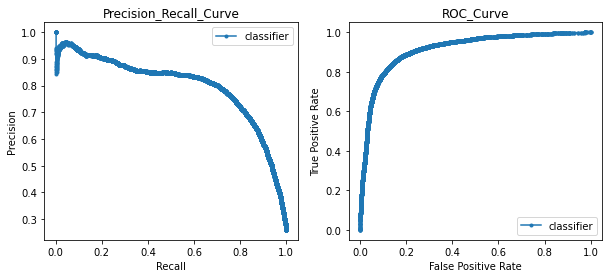

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7708  547]
 [ 259  470]]


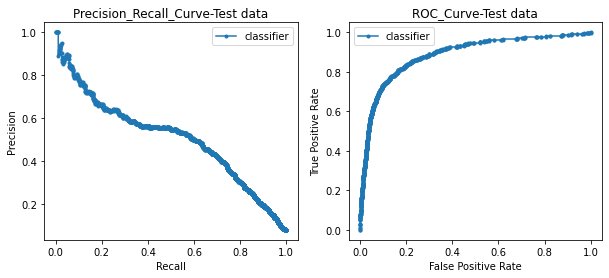

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.877418   0.787042  0.722700  0.753500  0.799264  0.916030
Test   0.910285   0.462144  0.644719  0.538373  0.509179  0.887718


In [92]:
##  check the classifier evaluation metrics
lr_base_metrics_df = eval_metrics(lr_model, 'Linear Regression - Base Model')

In [93]:
## predict the train and test probabilities using the model
y_train_pred_1 = lr_model.predict_proba(X_train)
y_test_pred_1 = lr_model.predict_proba(X_test)

,prob,accuracy,precision,recall
0.1,0.1,0.723182,0.482606,0.940653
0.2,0.2,0.818416,0.601264,0.889318
0.3,0.3,0.857418,0.685052,0.832938
0.4,0.4,0.872649,0.742195,0.779525
0.5,0.5,0.877418,0.787042,0.722700
0.6,0.6,0.871226,0.823788,0.640208
0.7,0.7,0.845994,0.848624,0.494065
0.8,0.8,0.809300,0.868182,0.311721
0.9,0.9,0.778645,0.912134,0.161721


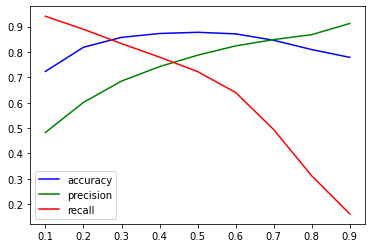

In [94]:
plot_cutoff_precision_recall(y_train, y_train_pred_1)

In [95]:
## use the determined cut-off to predict the Churn in train and test
y_train_pred = pd.Series(y_train_pred_1[:,1]).apply(lambda x : 1 if x > 0.4 else 0)
y_test_pred  = pd.Series(y_test_pred_1[:,1]).apply(lambda x : 1 if x > 0.4 else 0)

In [96]:
## display the model evaluation metrics
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("-"*50)
print("Test recall :", recall_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Train Confusion Matrix:
[[17434  1825]
 [ 1486  5254]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     19259
           1       0.74      0.78      0.76      6740

    accuracy                           0.87     25999
   macro avg       0.83      0.84      0.84     25999
weighted avg       0.87      0.87      0.87     25999

--------------------------------------------------
Test recall : 0.7160493827160493
Test Confusion Matrix:
[[7482  773]
 [ 207  522]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8255
           1       0.40      0.72      0.52       729

    accuracy                           0.89      8984
   macro avg       0.69      0.81      0.73      8984
weighted avg       0.93      0.89      0.90      8984



The precision on Test data is 0.4 with 0.4 cut-off point.

So the default model created with 0.5 cutoff points is best model

In [97]:
## crete a default model object
logreg = LogisticRegression(random_state=42, n_jobs=-1)
# creating a KFold object with 4 splits 
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 101)

# Create the parameter grid based on the results of random search 
params = {
    'C': [1, 10, 100, 1000]
}
# Instantiate the grid search model
lrmodel_cv = GridSearchCV(estimator=logreg, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "recall")
## fit the model using GridSearch
stime=time.time()
lrmodel_cv.fit(X_train,y_train)
etime=time.time()
print('Total time taken in sec :', round((etime-stime),2))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Total time taken in sec : 6.53


In [98]:
lrmodel_= lrmodel_cv.best_estimator_

In [99]:
lrmodel_.fit(X_train,y_train)

LogisticRegression(C=10, n_jobs=-1, random_state=42)

Train Accuracy:  0.877
Test Accuracy:  0.91


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[17937  1322]
 [ 1870  4870]]


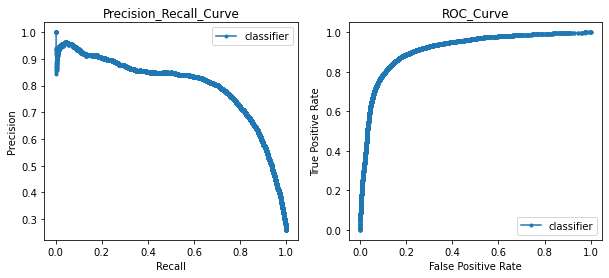

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7706  549]
 [ 260  469]]


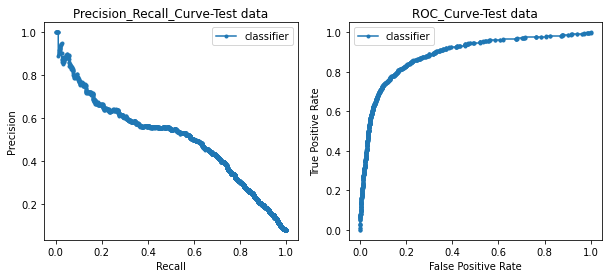

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.877226   0.786499  0.722552   0.75317  0.799269  0.916030
Test   0.909951   0.460707  0.643347   0.53692  0.509201  0.887729


In [100]:
lr_hparam_metrics_df=eval_metrics(lrmodel_,'Logistic Regression Hyp-param tuned model')

### 2. Support Vector Machine with PCA

In [101]:
from sklearn.svm import SVC

In [102]:
# create svm classifier object
svclassifier = SVC(kernel='rbf',probability=True)

In [103]:
svclassifier.fit(X_train, y_train)

SVC(probability=True)

Train Accuracy:  0.915
Test Accuracy:  0.917


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18248  1011]
 [ 1191  5549]]


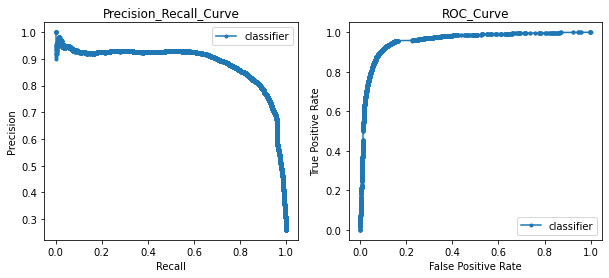

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7783  472]
 [ 271  458]]


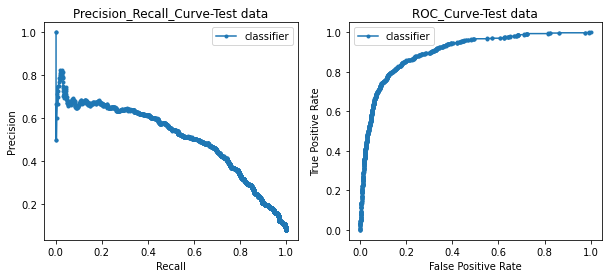

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.915304   0.845884  0.823294  0.834436  0.882197  0.958012
Test   0.917297   0.492473  0.628258  0.552140  0.506988  0.902955


In [104]:
svc_base_metrics_df=eval_metrics(svclassifier,'svc - base model')

### Old Code - Hyperparameter tuning - PCA and Logistic Regression

In [105]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.740759
1    0.259241
Name: Churn, dtype: float64

'# PCA
pca = PCA()

'# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

'# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

'# compile pipeline
pca_logistic = Pipeline(steps)

'# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

'# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

'# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

### 3. Decision Tree Classifier with PCA

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train_PCA.csv')
telecom_test =  pd.read_csv('telecom_test_PCA.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

In [108]:
#create the decision tree classifier
dt_model=DecisionTreeClassifier(max_depth=9)

In [109]:
# train the decision tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

Train Accuracy:  0.91
Test Accuracy:  0.877


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18084  1175]
 [ 1162  5578]]


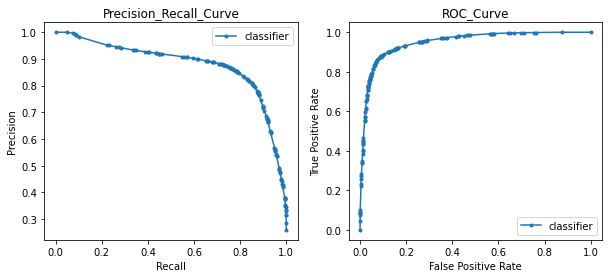

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7487  768]
 [ 341  388]]


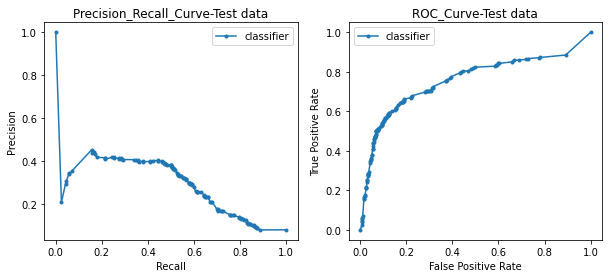

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.910112   0.826003  0.827596  0.826799  0.878653  0.950413
Test   0.876558   0.335640  0.532236  0.411671  0.293317  0.755479


In [110]:
dt_base_metrics_df=eval_metrics(dt_model, 'Decision Tree - Base Model')

In [111]:
# Decision Tree with hyperparameter tuning
#create the decision tree classifier
dt_model=DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [112]:
#Create hyperparameters
params = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}

In [113]:
# Data folds with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=101)

In [114]:
#perform Grid Search CV
dt_cv=GridSearchCV(estimator = dt_model,
                   param_grid = params,
                   cv = folds,
                   n_jobs=-1,
                   verbose = 1
                  )

In [115]:
# train the gridsearch cv model
best_dt=bestmodel_gridsrchcv(dt_cv)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Total Time Taken, sec :  380.39
The best score:  0.8634
criterion : gini
max_depth : 9
min_samples_leaf : 2
min_samples_split : 7


Train Accuracy:  0.908
Test Accuracy:  0.877


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18073  1186]
 [ 1203  5537]]


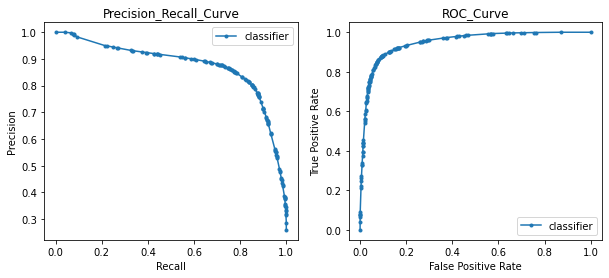

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7493  762]
 [ 340  389]]


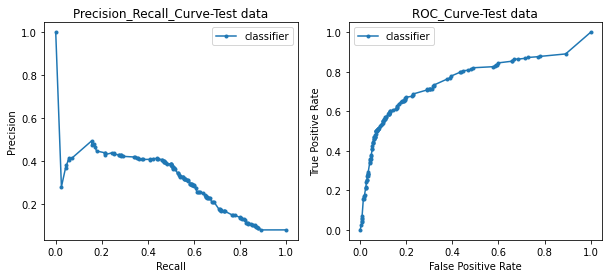

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.908112   0.823591  0.821513  0.822551  0.875771  0.949762
Test   0.877337   0.337967  0.533608  0.413830  0.308450  0.760016


In [116]:
dt_hparam_metrics_df=eval_metrics(best_dt,'Decision Tree Hyp-param tuned Model')

### 4. Random Forest Classifier with PCA

In [117]:
# Random forest Classifier without hyperparameter tuning

In [118]:
#create randomforest model object, without max_depth attribute
rf_model = RandomForestClassifier(random_state=42, max_depth=10)

In [119]:
#train the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Train Accuracy:  0.936
Test Accuracy:  0.923


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18836   423]
 [ 1239  5501]]


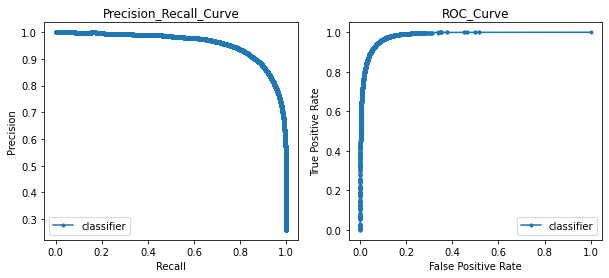

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7952  303]
 [ 391  338]]


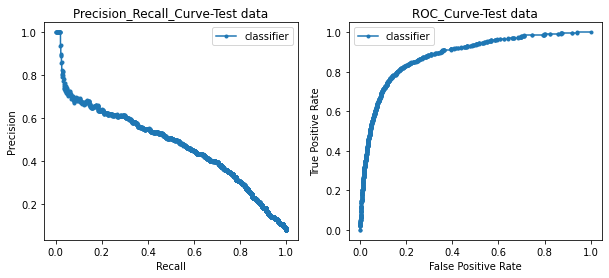

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.936074   0.928596  0.816172  0.868762  0.956165  0.983883
Test   0.922752   0.527301  0.463649  0.493431  0.479472  0.885226


In [120]:
rf_base_metrics_df=eval_metrics(rf_model, 'Random Forest - Base Model')

#### Random Forest with hyperparameter tuning

In [121]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [122]:
#Create KFolds with 5 splits
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=101)

In [123]:
#hyperparameters
params= {
    'max_depth':[1,10,15],
    'min_samples_leaf':[5,10,20],
    'max_features':['auto', 'None'],
    'n_estimators':[100,200]
}

In [124]:
rf_cv=GridSearchCV(estimator=rf_model, 
                   param_grid=params,
                   cv=folds, 
                   verbose = 1,
                   n_jobs=-1,
                   scoring = 'recall'
                  )

In [125]:
rf_best = bestmodel_gridsrchcv(rf_cv)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Total Time Taken, sec :  116.09
The best score:  0.7577
max_depth : 15
max_features : auto
min_samples_leaf : 5
n_estimators : 200


Train Accuracy:  0.972
Test Accuracy:  0.924


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[19062   197]
 [  539  6201]]


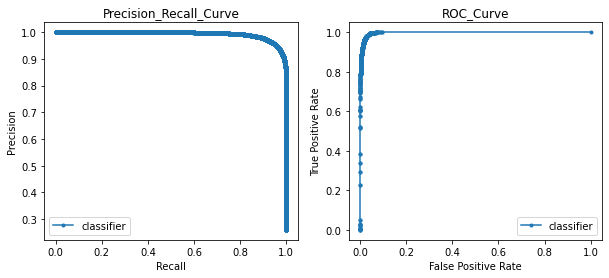

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7983  272]
 [ 408  321]]


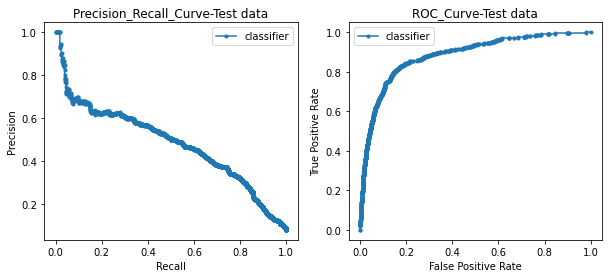

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.971691   0.969209  0.920030  0.943979  0.992347  0.997366
Test   0.924310   0.541315  0.440329  0.485628  0.482400  0.884868


In [126]:
rf_hparam_metrics_df = eval_metrics(rf_best,'Random Forest Hyp-param tuned Model')

### 5. XGBoost Classifier with PCA

In [127]:
from xgboost import XGBClassifier

In [128]:
## create a model object with random parameters
xgbmodel = XGBClassifier(max_depth=2,tree_method='gpu_hist')
## fit the model
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Train Accuracy:  0.895
Test Accuracy:  0.909


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18156  1103]
 [ 1619  5121]]


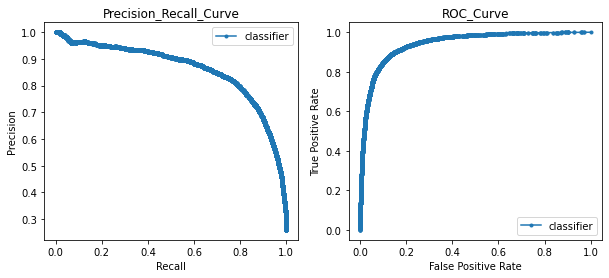

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7736  519]
 [ 297  432]]


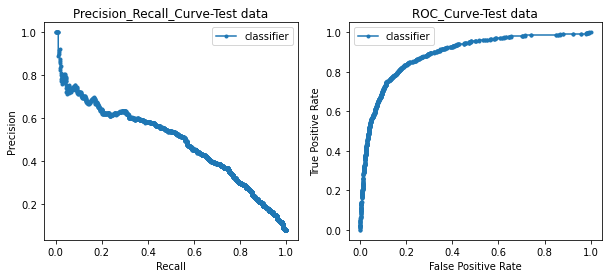

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.895304   0.822783  0.759792  0.790034  0.860158  0.943302
Test   0.909172   0.454259  0.592593  0.514286  0.492791  0.890248


In [129]:
xgb_base_metrics_df = eval_metrics(xgbmodel,'XGB - Base Model')

#### Classificication with XGBoost with hyperparameter tuning

In [130]:
xgb_model=XGBClassifier(tree_method='gpu_hist')

In [131]:
#create KFold object with 5 splits
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [132]:
#create parameter grid based on random search
params = {
    'max_depth':[2,3],
    'learning_rate':[.3],
    'n_estimators':[100,200],
    'min_child_weight':[1,10,100],
    'gamma':[0,1,30]
}

In [133]:
xgb_cv=GridSearchCV(estimator=xgb_model, 
                    param_grid=params,
                    cv=folds,
                    n_jobs=-1,
                    verbose=1 ,
                    scoring='recall')

In [134]:
#fit xgboost model with GridSearch 
best_xgb = bestmodel_gridsrchcv(xgb_cv)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Total Time Taken, sec :  50.81
The best score:  0.8144
gamma : 1
learning_rate : 0.3
max_depth : 3
min_child_weight : 1
n_estimators : 200


In [135]:
## printing the best score and hyperparameters
#best_score = xgb_cv.best_score_
#best_hyperparams = xgb_cv.best_params_
#print("The test score: ", best_score)
#print("The hyperparameters :", best_hyperparams)
## get the best estimator from grid search
#xgb_ = xgb_cv.best_estimator_
## fit the best model
#xgb_.fit(X_train,y_train)

Train Accuracy:  0.944
Test Accuracy:  0.917


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18612   647]
 [  803  5937]]


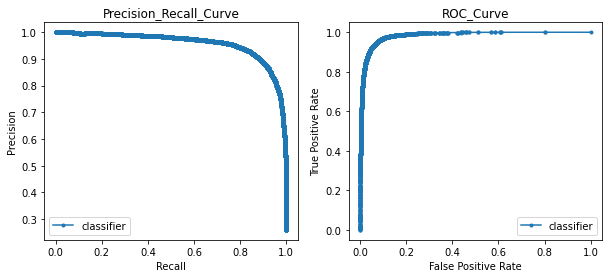

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7816  439]
 [ 306  423]]


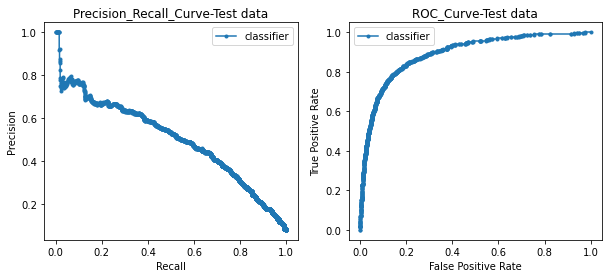

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.944229   0.901731  0.880861  0.891174  0.956603  0.984153
Test   0.917075   0.490719  0.580247  0.531741  0.504346  0.892396


In [136]:
##  check the classifier evaluation metrics
xgb_hparam_metrics_df = eval_metrics(best_xgb,'XGB Hyp-param tuned Model')

### 6. Gradient Boosting Classifier with PCA

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
#create the Gradient Boosting object
gb_model=GradientBoostingClassifier(max_depth=5, 
                                    max_features='auto',
                                    min_samples_leaf=10, 
                                    random_state=42)

In [139]:
#Train the model
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features='auto',
                           min_samples_leaf=10, random_state=42)

Train Accuracy:  0.937
Test Accuracy:  0.918


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18606   653]
 [  983  5757]]


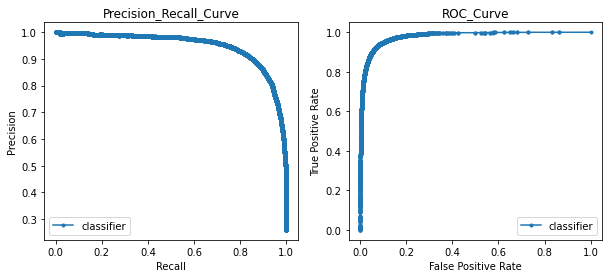

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7834  421]
 [ 320  409]]


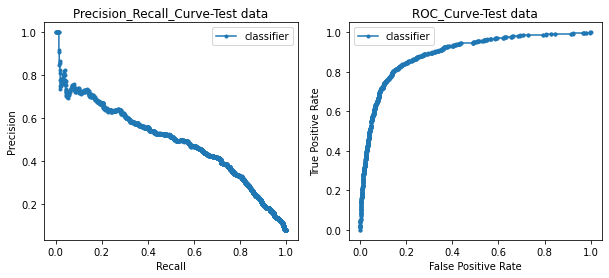

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.937075   0.898128  0.854154  0.875589  0.947635  0.979681
Test   0.917520   0.492771  0.561043  0.524695  0.495021  0.893788


In [140]:
gb_base_metrics_df = eval_metrics(gb_model,'Gradient Boosting - Base Model')

In [141]:
#### Gradient Boosting with hyperparameter tuning

In [142]:
#Create kFolds with 5 data splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [143]:
# create parameter grid based on results of random search
params = {
    'max_depth':[2,3],
    'n_estimators':[100,200],
    'max_features':['auto','None'],
    'min_samples_leaf':[5,10,25]
}


In [144]:
gb_cv=GridSearchCV(estimator=gb_model,
                  param_grid=params,
                  cv=folds,
                  verbose=1,
                  n_jobs=-1,
                  scoring='recall'
                  )

In [145]:
best_gb=bestmodel_gridsrchcv(gb_cv)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Total Time Taken, sec :  541.59
The best score:  0.7559
max_depth : 3
max_features : auto
min_samples_leaf : 10
n_estimators : 200


Train Accuracy:  0.912
Test Accuracy:  0.914


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18355   904]
 [ 1391  5349]]


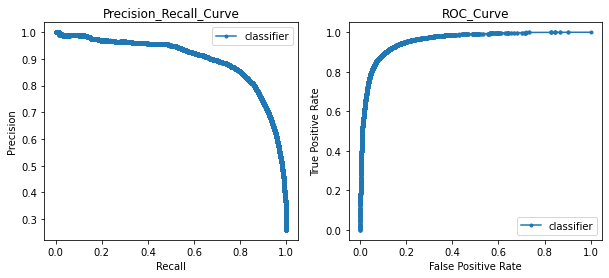

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7781  474]
 [ 295  434]]


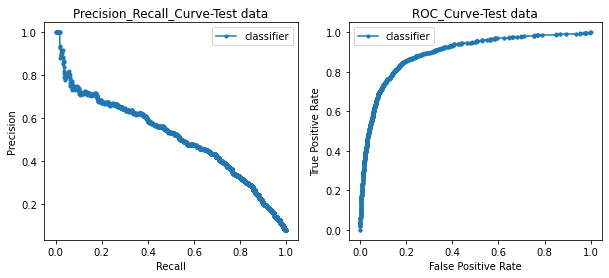

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.911727   0.855429  0.793620  0.823366  0.898034  0.958788
Test   0.914403   0.477974  0.595336  0.530238  0.512637  0.895613


In [146]:
gb_hparam_metrics_df = eval_metrics(best_gb,'Gradient Boosting Hyp-param tuned Model')

### 7. ADA Boost with PCA

In [147]:
#ADA Boost without hyperparameter tuning

In [148]:
## import the needed libraries
from sklearn.ensemble import AdaBoostClassifier

In [149]:
## create Ada Boost classifier object
ada=AdaBoostClassifier(n_estimators=30)


In [150]:
# Train the ada boost model
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30)

Train Accuracy:  0.859
Test Accuracy:  0.898


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[17870  1389]
 [ 2266  4474]]


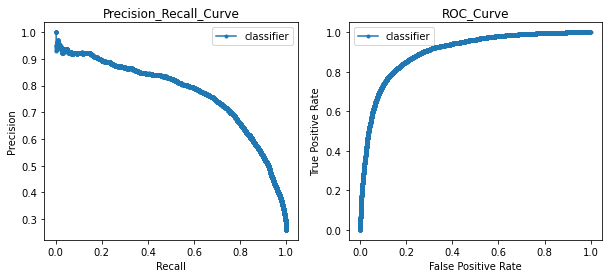

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7660  595]
 [ 317  412]]


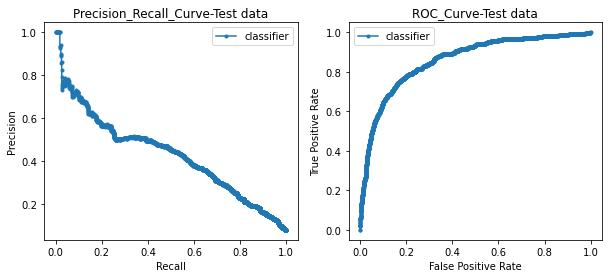

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.859418   0.763091  0.663798  0.709990  0.772634  0.903130
Test   0.898486   0.409136  0.565158  0.474654  0.432328  0.860926


In [151]:
ada_base_metrics_df = eval_metrics(ada,'ADA Boost - Base Model')

#### Ada boost with hyperparameter tuning

In [152]:
# hyperparameters,  parameter grid
params={'n_estimators':[100,200,300,500],'learning_rate':[.001,0.01,.1]}


In [153]:
ada_cv=GridSearchCV(estimator=ada,param_grid=params,scoring='accuracy',n_jobs=-1,cv=3)

In [154]:
best_ada=bestmodel_gridsrchcv(ada_cv)

Total Time Taken, sec :  299.08
The best score:  0.8703
learning_rate : 0.1
n_estimators : 500


Train Accuracy:  0.876
Test Accuracy:  0.91


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18162  1097]
 [ 2129  4611]]


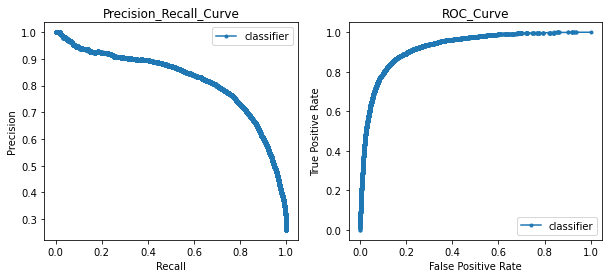

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7766  489]
 [ 316  413]]


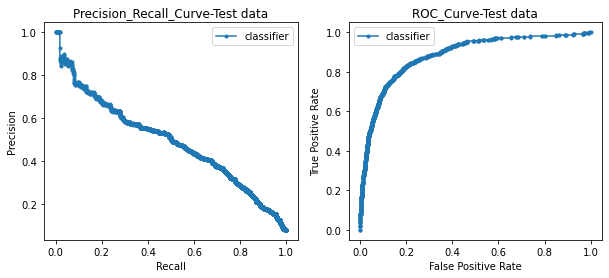

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.875918   0.807814  0.684125  0.740842  0.819936  0.925647
Test   0.910396   0.457871  0.566529  0.506438  0.491957  0.884771


In [155]:
ada_hparam_metrics_df = eval_metrics(best_ada,'ADA Boost Hyp-param tuned Model')

### 8. XGBoost without PCA for Feature Importance

In [156]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train.csv')
telecom_test =  pd.read_csv('telecom_test.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

In [157]:
## select the columns that are totals of other columns. 
cols =['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'
]
## Drop the selected columns to avoid multicollinearity
X_train = X_train.drop(columns=cols)
## Drop the selected columns to avoid multicollinearity
X_test = X_test.drop(columns=cols)

Recursive Feature Elimination - RFE

Feature Selection: Tune the Hyperparameters of RFE to find the optimal set of features

In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [159]:
## create hyperparameter list of n_features_to_select and run GridSearchCV 
# to select the optimal parameter

# list of paramters to tune
params = {'n_features_to_select': [30,40,50,60,70,80,90,100]} 

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf)

folds = 3

# cross validation
rfe_cv = GridSearchCV(estimator = rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)    
rfe_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RFE(estimator=LinearRegression()), n_jobs=-1,
             param_grid={'n_features_to_select': [30, 40, 50, 60, 70, 80, 90,
                                                  100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [160]:
#best_rfe=bestmodel_gridsrchcv(rfe_cv)

In [161]:
## view the cross validation results in a dataframe
cv_results = pd.DataFrame(rfe_cv.cv_results_)
#cv_results

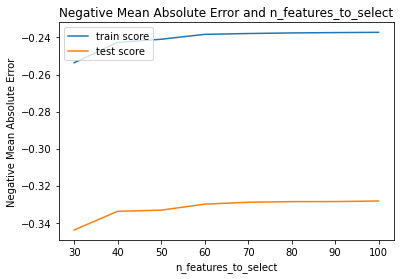

In [162]:
# plotting mean test and train scores with n_features_to_select
cv_results['param_n_features_to_select'] = cv_results['param_n_features_to_select'].astype('float32')

# plotting
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.xlabel('n_features_to_select')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and n_features_to_select")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [163]:
# show the best score and best hyperparameter value
best_score = rfe_cv.best_score_
best_features_to_select = rfe_cv.best_params_['n_features_to_select']

print(" The highest test neg MAE is {0} at n_features_to_select = {1}".format(best_score, best_features_to_select))

 The highest test neg MAE is -0.32825419244937476 at n_features_to_select = 100


In [164]:
# run RFE using the best hyperparameter value determined
n_features = 50

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [165]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 17),
 ('arpu_7', False, 4),
 ('arpu_8', True, 1),
 ('roam_ic_mou_6', False, 61),
 ('roam_ic_mou_7', False, 46),
 ('roam_ic_mou_8', False, 30),
 ('roam_og_mou_6', False, 80),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 2),
 ('loc_og_t2t_mou_6', False, 73),
 ('loc_og_t2t_mou_7', False, 58),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 22),
 ('loc_og_t2m_mou_7', False, 79),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 16),
 ('loc_og_t2f_mou_7', False, 54),
 ('loc_og_t2f_mou_8', False, 77),
 ('loc_og_t2c_mou_6', False, 21),
 ('loc_og_t2c_mou_7', False, 76),
 ('loc_og_t2c_mou_8', False, 65),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 5),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 81),
 ('std_og_t2f_mou_7', False, 45),
 ('std_og_t2f_mou_8', False, 23),
 ('isd_og_mou_6', False, 67),
 ('isd_og_mou_7', F

In [166]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'roam_og_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_8',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_7', 'arpu_3g_8', 'arpu_2g_7', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aon',
       'recency_of_last_rech', 'recency_of_last_da

In [167]:
## select only the columns identified by RFE
X_train = X_train[X_train.columns[rfe.support_]]
X_test =  X_test[X_test.columns[rfe.support_]]

In [168]:
## create a model object with random parameters-base model
xgb_rfe_ = XGBClassifier(max_depth=2,tree_method='gpu_hist')

In [169]:
## fit the model
xgb_rfe_.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Train Accuracy:  0.944
Test Accuracy:  0.94


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18671   588]
 [  865  5875]]


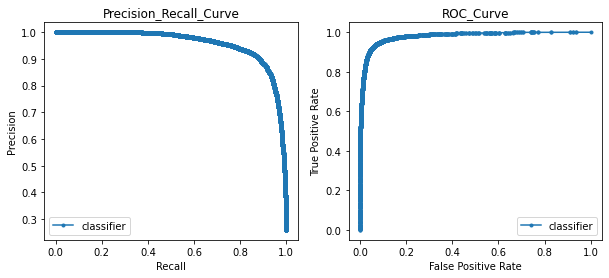

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[8010  245]
 [ 292  437]]


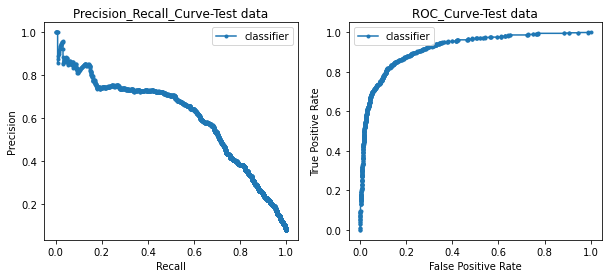

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.944113   0.909021  0.871662  0.889949  0.956011  0.980368
Test   0.940227   0.640762  0.599451  0.619419  0.607190  0.919716


In [170]:
##  check the classifier evaluation metrics
XG_fi_base_metrics_df = eval_metrics(xgb_rfe_,'XG Boost Feature Imp Base Model')

In [171]:
## crete a default model object
xgb_ = XGBClassifier(tree_method='gpu_hist')
# creating a KFold object with 3 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 101)

# Create the parameter grid 
params = {
    "max_depth" : [2,3],
    "learning_rate": [0.1],
    "n_estimators":[100,200],
    "min_child_weight":[1,10,100],
    "gamma":[0,1,30]
}
# Instantiate the grid search model
xgb1_cv = GridSearchCV(estimator=xgb_, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "recall")

In [172]:
# train the grid search and get the best model 
best_xgb1=bestmodel_gridsrchcv(xgb1_cv)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Total Time Taken, sec :  28.22
The best score:  0.8681
gamma : 0
learning_rate : 0.1
max_depth : 3
min_child_weight : 1
n_estimators : 200


Train Accuracy:  0.949
Test Accuracy:  0.94


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[18691   568]
 [  751  5989]]


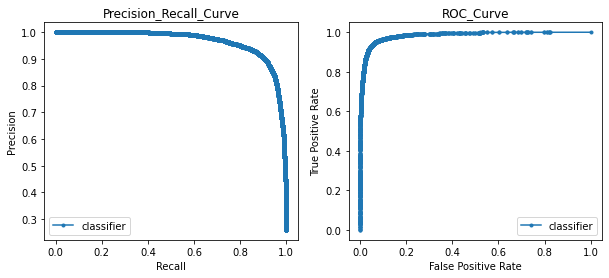

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[8007  248]
 [ 288  441]]


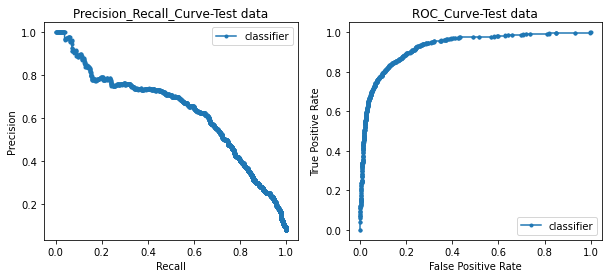

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.949267   0.913375  0.888576  0.900805  0.964275  0.984588
Test   0.940338   0.640058  0.604938  0.622003  0.631359  0.927777


In [173]:
##  check the classifier evaluation metrics
XG_fi_hyp_metrics_df = eval_metrics(best_xgb1,'XG Boost Feature Imp HypTuned Model')

In [174]:
## get the feature importances 
best_xgb1.feature_importances_

array([0.00320882, 0.02378179, 0.00752951, 0.00777558, 0.01477842,
       0.01415525, 0.00481647, 0.00635346, 0.01201108, 0.01249428,
       0.00717522, 0.14359947, 0.01923621, 0.00907563, 0.01474753,
       0.03327508, 0.01644175, 0.00676055, 0.1063356 , 0.00724497,
       0.01486747, 0.04139583, 0.00542341, 0.01398015, 0.02367981,
       0.00878639, 0.02519251, 0.00538709, 0.00623326, 0.00671889,
       0.00681904, 0.00960574, 0.00504167, 0.00375127, 0.01933716,
       0.02802918, 0.03230838, 0.01271783, 0.00731511, 0.01103217,
       0.00664018, 0.01162852, 0.00572964, 0.02120492, 0.01512729,
       0.        , 0.12348512, 0.00733736, 0.04073787, 0.00969003],
      dtype=float32)

In [175]:
best_xgb1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
## create dataframe
#feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
#feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
#feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
#print("Sum of importance=", feature_importance.importance_percentage.sum())
#feature_importance


## create a feature importance dataframe
imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "Impartance": best_xgb1.feature_importances_*100
})
## display the feature importances dataframe
imp_df=imp_df.sort_values(by="Impartance", ascending=False)
imp_df.head(20)

,Features,Impartance
11,loc_ic_t2m_mou_8,14.359946
46,fb_user_8,12.348512
18,total_rech_amt_8,10.633560
21,last_day_rch_amt_8,4.139583
48,recency_of_last_rech,4.073788
15,total_rech_num_7,3.327508
36,monthly_2g_8,3.230838
35,monthly_2g_7,2.802918
26,count_rech_2g_7,2.519251
1,roam_og_mou_7,2.378179


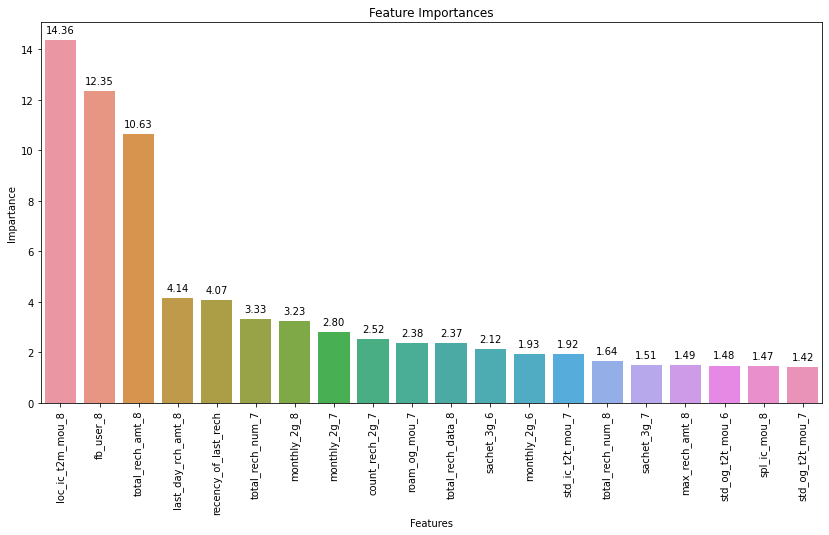

In [177]:
## plot the feature importances of top 25 variables
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=imp_df.iloc[0:20,:], x='Features', y='Impartance',ax=ax)
ax.set_title("Feature Importances")
plt.xticks(rotation=90)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### 8. Logistic Regression without PCA for Feature Importance

In [178]:
# X_train, X_test, y_train, y_test are same as previous case

In [179]:
params = {'n_features_to_select': [30,40,50,60,70,80,90,100]} 

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf)

folds = 3

# cross validation
lr1_cv = GridSearchCV(estimator = rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            

#model_cv.fit(X_train, y_train) 

In [180]:
#train grid search and get best model and train the best model with the train data 
best_lr1=bestmodel_gridsrchcv(lr1_cv)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Total Time Taken, sec :  1.98
The best score:  -0.3305
n_features_to_select : 50


In [181]:
# View cross validation results in a dataframe
#cv_results = pd.DataFrame(model_cv.cv_results_)

In [182]:
# run RFE using the best hyperparameter value determined
n_features = 50

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [183]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', True, 1),
 ('roam_og_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_7', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('std_ic_t2t_mou_7', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_6', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_7', True, 1),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_6', True, 1),
 ('total_rech_data_7', True, 1),
 ('total_rech_data_8', True, 1),
 ('count_rech_2g_6', True, 1),
 ('count_rech_2g_7', True, 1),
 ('count_rech_2g_8', True, 1),
 ('count_rech_3g_6', True, 1),
 ('count_rech_3g_7', True, 1),
 ('count_rech_3g_8', True, 1),
 ('av_rech_amt_data_7', True, 

In [184]:
## list of features selected by RFE
X_train.columns[rfe.support_]

Index(['arpu_8', 'roam_og_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_8',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_7', 'arpu_3g_8', 'arpu_2g_7', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aon',
       'recency_of_last_rech', 'recency_of_last_da

In [185]:
## select only the columns identified by RFE
X_train_new = X_train[X_train.columns[rfe.support_]]
X_test_new =  X_test[X_test.columns[rfe.support_]]

Train Accuracy:  0.878
Test Accuracy:  0.91


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[17923  1336]
 [ 1831  4909]]


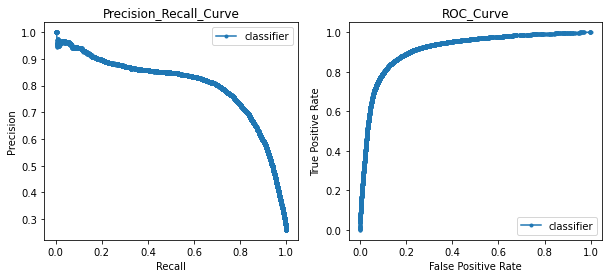

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7688  567]
 [ 239  490]]


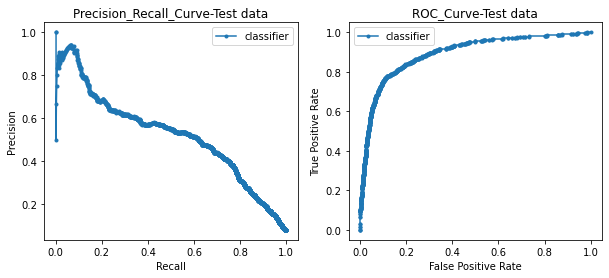

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.878188   0.786069  0.728338  0.756103  0.802110  0.917286
Test   0.910285   0.463576  0.672154  0.548712  0.523546  0.893418


In [186]:
## create a model object with random parameters
lr_f_model = LogisticRegression(C=1)
## fit the model
lr_f_model.fit(X_train_new, y_train)
##  check the classifier evaluation metrics
lr_fi_base_metrics_df = eval_metrics(lr_f_model,'Logistic Regression Feature Imp Base Model')

In [187]:
## run gridsearch cv for Logistic Regression
lr_final = LogisticRegression()

#penalty = ['l1','l2']
# define grid search
params = {'C': [1, 10, 100, 1000],'penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits=5,  random_state=1,shuffle=True)
lrgrid_cv = GridSearchCV(estimator=lr_final, param_grid=params, n_jobs=-1, cv=folds, scoring='accuracy',error_score=0)
grid_result = lrgrid_cv.fit(X_train_new, y_train)

In [188]:
grid_result.best_params_

{'C': 100, 'penalty': 'l2'}

Train Accuracy:  0.878
Test Accuracy:  0.91


TRAIN DATA - RESULTS
Train dataset- Confusion Matrix:
 [[17923  1336]
 [ 1829  4911]]


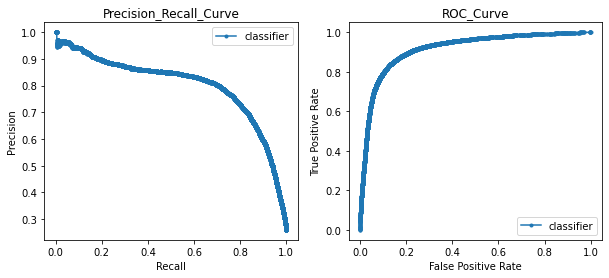

TEST DATA - RESULTS
Test dataset- Confusion Matrix: 
 [[7688  567]
 [ 239  490]]


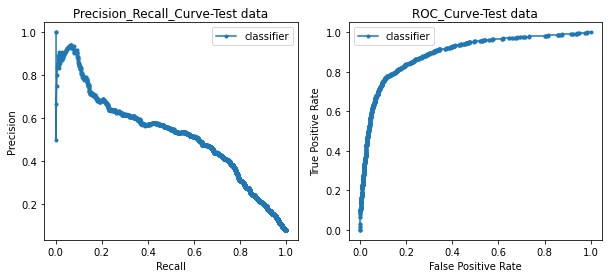

SUMMARY, MODEL NAME : 
       Accuracy  Precision    Recall  f1_score    PR_AUC   ROC_AUC
Train  0.878265   0.786137  0.728635  0.756295  0.802107  0.917299
Test   0.910285   0.463576  0.672154  0.548712  0.523651  0.893408


In [189]:
## Create model with the best parameters
Final_model = LogisticRegression(C=100,penalty ='l2',solver = 'liblinear')
## Fit the best model
Final_model.fit(X_train,y_train)
##  check the classifier evaluation metrics
lr_fi_hyp_metrics_df = eval_metrics(Final_model,'Logistic Regression Feature Imp HypTuned Model')

### Results  - Consolidation

In [190]:
## concat the evaluation from all models and display them
summary_metrics =pd.concat([lr_base_metrics_df,lr_hparam_metrics_df,
                            dt_base_metrics_df,dt_hparam_metrics_df,
                            rf_base_metrics_df,rf_hparam_metrics_df,
                            xgb_base_metrics_df,xgb_hparam_metrics_df,
                            gb_base_metrics_df,gb_hparam_metrics_df,
                            svc_base_metrics_df,
                            ada_base_metrics_df,ada_hparam_metrics_df,
                            lr_fi_base_metrics_df,lr_fi_hyp_metrics_df,
                            XG_fi_base_metrics_df,XG_fi_hyp_metrics_df],axis=0)



In [191]:
type(summary_metrics)

pandas.core.frame.DataFrame

In [210]:
# set max columns to none
pd.set_option("display.max_columns", None)
 
# set colwidth hidher
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_colwidth', -1)

pd.set_option('precision', 4)

In [203]:
#from IPython.display import display, HTML
#display(HTML(summary_metrics.to_html()))
#HTML("<style>.rendered_html th {max-width: 100px;}</style>")

In [204]:
#summary_metrics.columns = summary_metrics.columns.str.replace('tr', 'train')
#summary_metrics.columns = summary_metrics.columns.str.replace('tst', 'test')
#summary_metrics.columns = summary_metrics.columns.str.replace('train_roauc', 'train prauc')
summary_metrics.columns = summary_metrics.columns.str.replace('test_roauc', 'test prauc')
summary_metrics.columns = summary_metrics.columns.str.replace('test_rocauc', 'test rocauc')

In [211]:
summary_metrics

,Model name,train acc,train prec,train Recall,train prauc,train rocauc,test acc,test prec,test Recall,test prauc,test rocauc
0,Linear Regression - Base Model,0.8774,0.7870,0.7227,0.7993,0.9160,0.9103,0.4621,0.6447,0.5092,0.8877
0,Logistic Regression Hyp-param tuned model,0.8772,0.7865,0.7226,0.7993,0.9160,0.9100,0.4607,0.6433,0.5092,0.8877
0,Decision Tree - Base Model,0.9101,0.8260,0.8276,0.8787,0.9504,0.8766,0.3356,0.5322,0.2933,0.7555
0,Decision Tree Hyp-param tuned Model,0.9081,0.8236,0.8215,0.8758,0.9498,0.8773,0.3380,0.5336,0.3085,0.7600
0,Random Forest - Base Model,0.9361,0.9286,0.8162,0.9562,0.9839,0.9228,0.5273,0.4636,0.4795,0.8852
0,Random Forest Hyp-param tuned Model,0.9717,0.9692,0.9200,0.9923,0.9974,0.9243,0.5413,0.4403,0.4824,0.8849
0,XGB - Base Model,0.8953,0.8228,0.7598,0.8602,0.9433,0.9092,0.4543,0.5926,0.4928,0.8902
0,XGB Hyp-param tuned Model,0.9442,0.9017,0.8809,0.9566,0.9842,0.9171,0.4907,0.5802,0.5043,0.8924
0,Gradient Boosting - Base Model,0.9371,0.8981,0.8542,0.9476,0.9797,0.9175,0.4928,0.5610,0.4950,0.8938
0,Gradient Boosting Hyp-param tuned Model,0.9117,0.8554,0.7936,0.8980,0.9588,0.9144,0.4780,0.5953,0.5126,0.8956


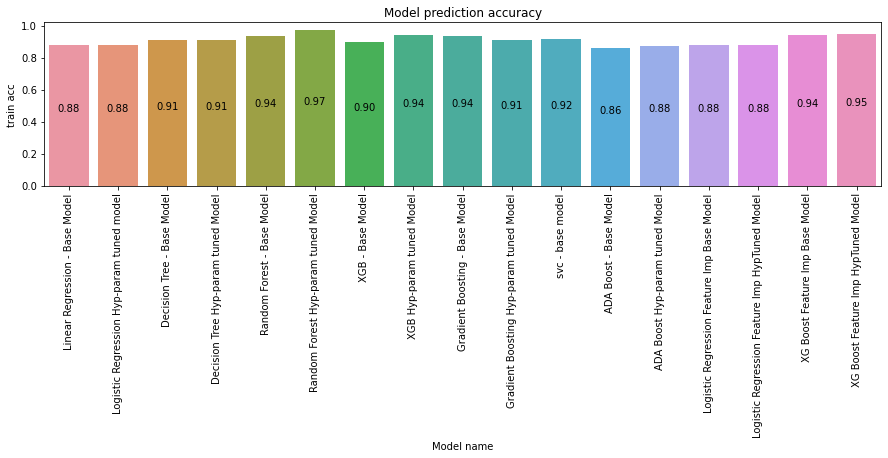

In [213]:
# Plot the Feature Importance 
## plot the feature importances of top 25 variables
fig, ax = plt.subplots(figsize=(15,3))
sns.barplot(data=summary_metrics, x='Model name', y='train acc', ax=ax)
ax.set_title("Model prediction accuracy")
plt.xticks(rotation=90)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()/2),
    ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')

### Summary and Recommendations

#### Select the best model

1. High ROC-AUC score for Train and Test indicates models- Ability to classify between Churn and Non-Churners
2. High Test Recall value indicates strong prediction of Actual Churners. However with adequate trade-off with Precision to avoid high false positivies. Hence better PR-AUC.
3. Less variance between Train and Test models on key metrics ROC-AUC and Recall

Model selected is Logistic Regression with PCA components

Train model metrics
ROC-AUC : 0.91,
Recall : 0.72,
Precision : 0.78,
PR-AUC : 0.79

Test model metrics
ROC-AUC : 0.88,
Recall : 0.64,
Precision : 0.46,
PR-AUC : 0.5

##  Business Recomendations

<span style='font-family:serif'> 
<font size="3">
    
1. Incoming call minutes of usage(MOU) is a strong indicator of Churn, Company should monitor the incoming minutes of usage closely.

2. Special plans to be offered to customers with reduced MOU, like reduced tariff plans or free subscription of Netflix/Amazon etc

3. The average age on network(AON) for Churners is about 1 year. Company should monitor users with AON close to 1 yr to 1.5 years. Take surveys by making special calls to those customers to understand their experience and take remedial actions if required to serve them better thereby helping to retain them.

4. As non-FB users tend to churn more, offer free/reduced tariff data packs to encourage FB/social media usage

5. Company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

6. STD outgoing MOU is a strong indicator of Churn. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages    
</font>
</span>

**** End of the Project ************